<a href="https://colab.research.google.com/github/williamedwardhahn/ComplexSystems/blob/main/Complex_Systems_Lab_Turing_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# http://ideonexus.github.io/Explorable-Explanations/math/binarycountingmachine/

In [1]:
# Turing Machine simulator
# M is indexed by the current tape symbol (0 or 1) and then by state to get an 'instruction' comprising three (3) thing:
# 1) Symbol to write on current tape position,
# 2) Dir head direction action (0 = move left, +1 = move right) (2*(d)-1) convert 0 and 1 to -1 and +1
# 3) Next state.

In [ ]:
# symbol, dir, state = prog[state][symbol]
# 
# #          symbol 0    symbol 1   symbol b
# M =    [[ (b, 1, 0),  (b,  1, 0),  (b,  0, 1)],     # state 0
#         [ (1, 1, 0),  (0,  0, 1),  (0,  0, 0)]]     # state 1

In [ ]:
b = 2

In [ ]:
p = 2**np.arange(0,8)[::-1] # for decimal to binary

In [ ]:
p

array([128,  64,  32,  16,   8,   4,   2,   1])

In [ ]:
M = np.zeros((3,2,3)).astype(int)
    # symbol: 0, 1, b

#symbol
M[0,:,:] = [[ b, b, b],       # state 0
            [ 1, 0, 0]]       # state 1
#dir
M[1,:,:] = [[ 1, 1, 0],
            [ 1, 0, 0]] 
#state
M[2,:,:] = [[ 0, 0, 1],
            [ 0, 1, 0]] 

In [ ]:
state = 0
i = 8

In [ ]:
tape = np.zeros(9,).astype(int)
tape[len(tape)-1] = b

for steps in range(100):

    if i == 8:
        print(tape[:-1],np.sum(tape[:-1]*p))

    new_symbol = M[0][state][tape[i]]
    d          = M[1][state][tape[i]]
    new_state  = M[2][state][tape[i]]

    if new_symbol != b:
        tape[i] = new_symbol

    state = new_state
    i = i + (2*(d)-1)

[0 0 0 0 0 0 0 0] 0
[0 0 0 0 0 0 0 1] 1
[0 0 0 0 0 0 1 0] 2
[0 0 0 0 0 0 1 1] 3
[0 0 0 0 0 1 0 0] 4
[0 0 0 0 0 1 0 1] 5
[0 0 0 0 0 1 1 0] 6
[0 0 0 0 0 1 1 1] 7
[0 0 0 0 1 0 0 0] 8
[0 0 0 0 1 0 0 1] 9
[0 0 0 0 1 0 1 0] 10
[0 0 0 0 1 0 1 1] 11
[0 0 0 0 1 1 0 0] 12
[0 0 0 0 1 1 0 1] 13
[0 0 0 0 1 1 1 0] 14
[0 0 0 0 1 1 1 1] 15
[0 0 0 1 0 0 0 0] 16
[0 0 0 1 0 0 0 1] 17
[0 0 0 1 0 0 1 0] 18
[0 0 0 1 0 0 1 1] 19
[0 0 0 1 0 1 0 0] 20
[0 0 0 1 0 1 0 1] 21
[0 0 0 1 0 1 1 0] 22
[0 0 0 1 0 1 1 1] 23
[0 0 0 1 1 0 0 0] 24
[0 0 0 1 1 0 0 1] 25
[0 0 0 1 1 0 1 0] 26


In [ ]:
M.shape

(3, 2, 3)

In [ ]:
m = M.flatten()

In [ ]:
m.shape[0]

18

In [ ]:
m

array([2, 2, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0])

In [ ]:
t = 3**np.arange(0,m.shape[0])[::-1] # for decimal/trinary

In [ ]:
t

array([129140163,  43046721,  14348907,   4782969,   1594323,    531441,
          177147,     59049,     19683,      6561,      2187,       729,
             243,        81,        27,         9,         3,         1])

In [ ]:
np.sum(m*t)

378097338

In [ ]:
def ternary(n):
    if n == 0:
        return '0'
    nums = []
    while n:
        n, r = divmod(n, 3)
        nums.append(str(r))
    return ''.join(reversed(nums))

In [ ]:
ternary(2)

'2'

In [ ]:
ternary(3)

'10'

In [ ]:
ternary(378097338)

'222100110100001010'

In [ ]:
max = int(np.sum((2*np.ones(m.shape))*t))

In [ ]:
max

387420488

In [ ]:
np.random.randint(max)

237217930

In [ ]:
def split(word): 
    return [int(char) for char in word]  

In [ ]:
M = np.zeros((3,3,3)).astype(int)

In [ ]:
len(M.flatten())

27

In [ ]:
max = 3**27

In [ ]:
max

7625597484987

In [ ]:
M.shape

(3, 3, 3)

In [ ]:
M = np.zeros((3,3,3)).astype(int)
c = ternary(np.random.randint(max))
M = np.array(split(c)).reshape(M.shape)

In [ ]:
N = 20
p = 2**np.arange(0,N)[::-1] # for decimal to binary

In [ ]:
M = np.random.randint(0,3,(3,3,3))

state = 0
i = 10

tape = np.zeros(N,).astype(int)
tape[10] = 1

for steps in range(10):

    print(tape,np.sum(tape*p))

    new_symbol = M[0][state][tape[i]]
    d          = M[1][state][tape[i]]
    new_state  = M[2][state][tape[i]]

    if new_symbol != b:
        tape[i] = new_symbol

    state = new_state
    i = i + (2*(d)-1)

    if i > N-1: 
        break

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 0
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0] 256
[0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0] 768
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0] 640
[0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0] 896
[0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0] 768
[0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0] 832
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0] 960


In [ ]:
3**(3**3)

7625597484987

In [ ]:
def RTM():
    
    M = np.random.randint(0,3,(3,3,3))

    state = 0
    i = 10

    tape = np.zeros(N,).astype(int)
    tape[10] = 1

    for steps in range(20):

        print(tape,np.sum(tape*p))

        new_symbol = M[0][state][tape[i]]
        d          = M[1][state][tape[i]]
        new_state  = M[2][state][tape[i]]

        if new_symbol != b:
            tape[i] = new_symbol

        state = new_state
        i = i + (2*(d)-1)

        if i > N-1: 
            break

In [ ]:
RTM()

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512


In [ ]:
%%timeit
RTM()

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0

In [ ]:
for i in range(100):
    RTM()
    print("####################")

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
####################
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 512
[0 0 0 0 0 0 

In [ ]:
N = 100

In [ ]:
def RTM():

    M = np.random.randint(0,3,(3,3,3))

    state = 0
    i = N//2

    tape = np.zeros(N,).astype(int)
    tape[N//2] = 1

    # tape = (np.random.random(N,) > 0.5).astype(int)

    steps = 100
    T = np.zeros((steps,N)).astype(int)

    for step in range(steps):

        # print(tape,np.sum(tape*p))

        new_symbol = M[0][state][tape[i]]
        d          = M[1][state][tape[i]]
        new_state  = M[2][state][tape[i]]

        if new_symbol != b:
            tape[i] = new_symbol

        state = new_state
        i = i + (2*(d)-1)

        if np.abs(i) > N-1: 
            break

        T[step] = tape

    return T

In [ ]:
RTM()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

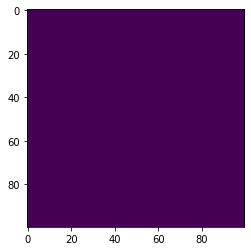

In [ ]:
plt.imshow(RTM())

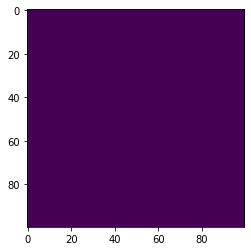

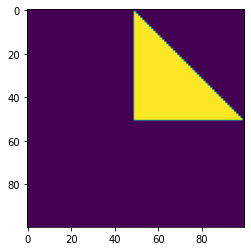

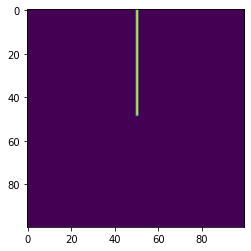

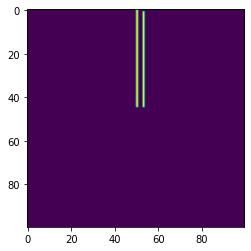

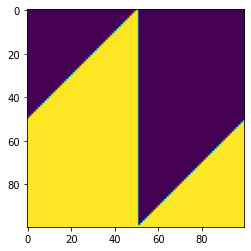

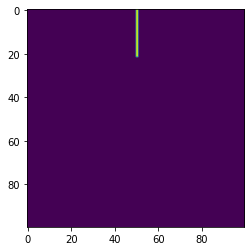

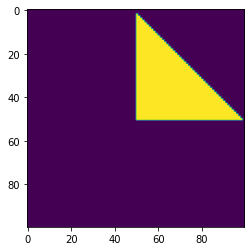

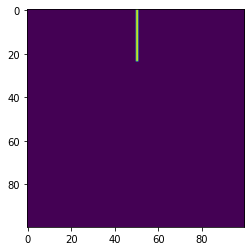

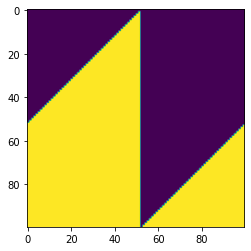

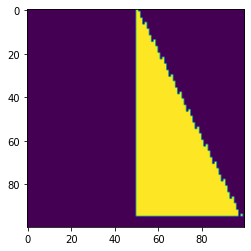

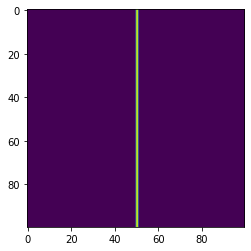

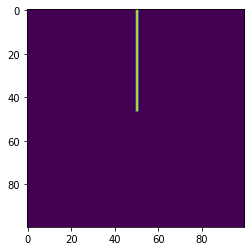

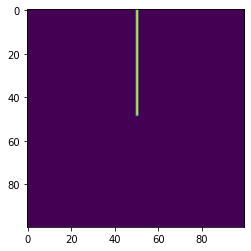

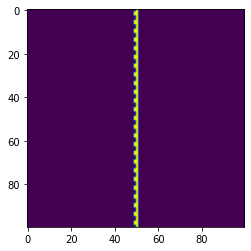

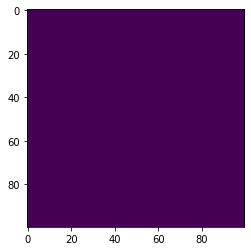

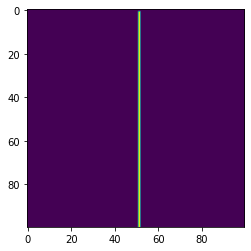

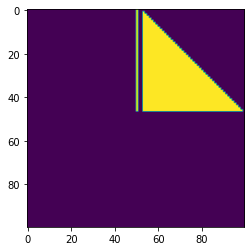

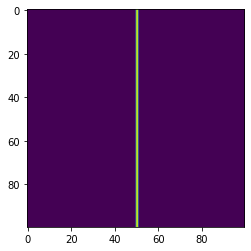

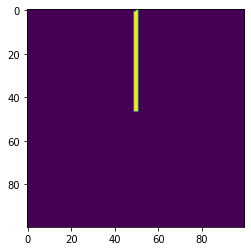

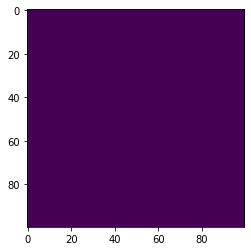

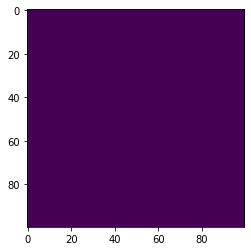

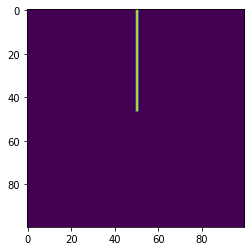

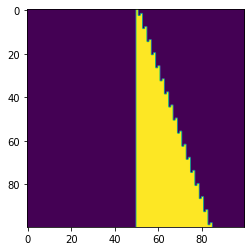

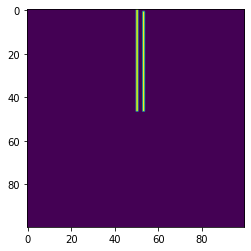

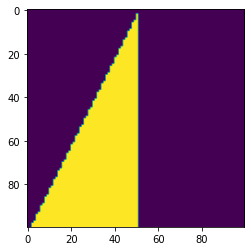

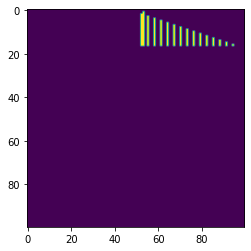

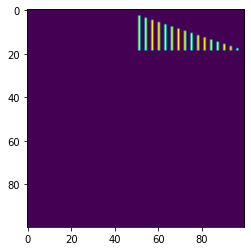

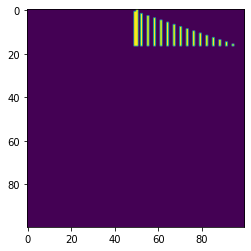

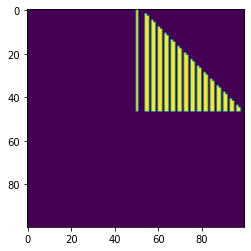

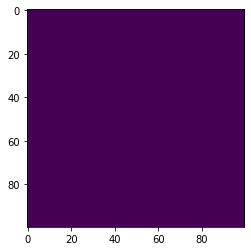

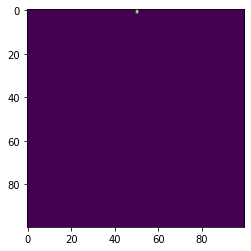

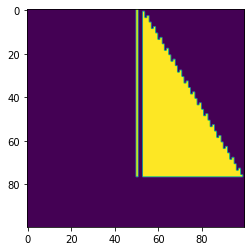

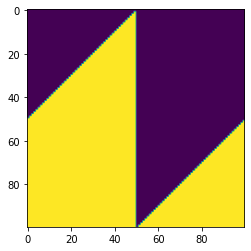

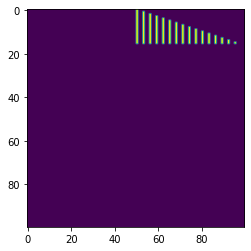

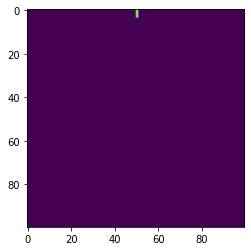

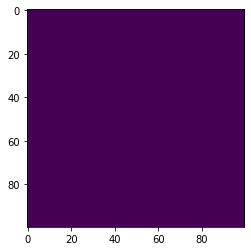

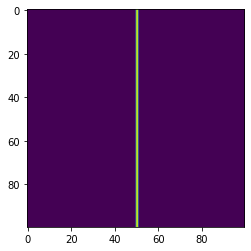

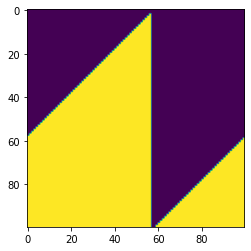

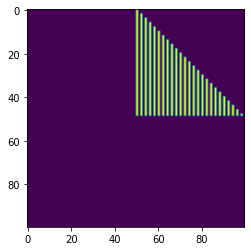

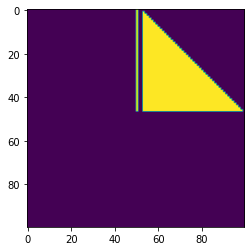

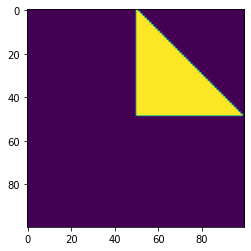

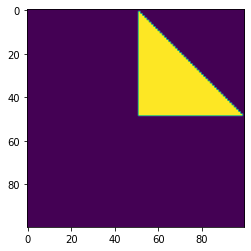

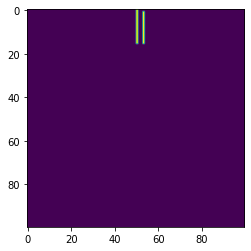

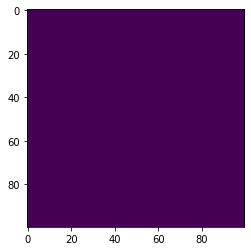

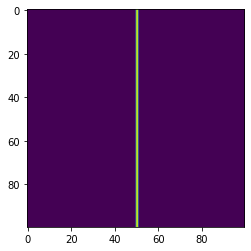

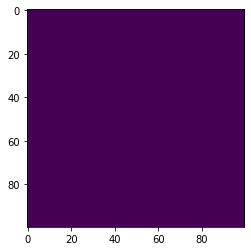

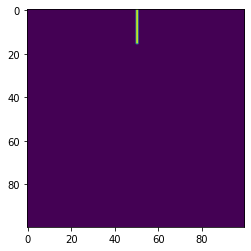

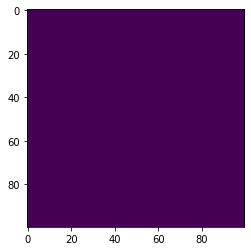

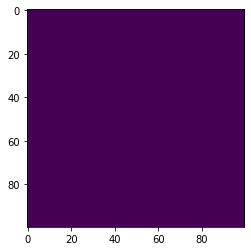

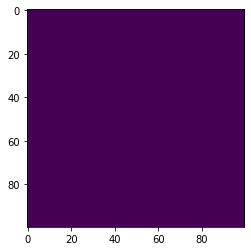

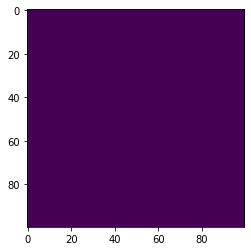

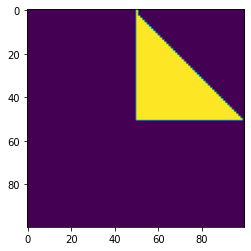

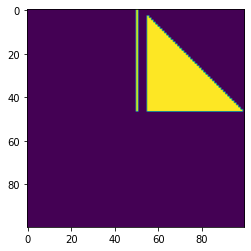

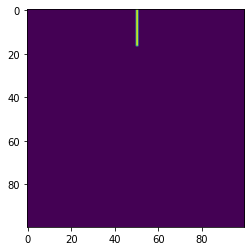

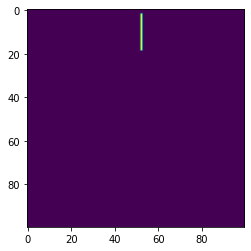

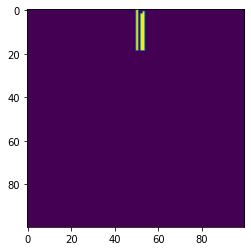

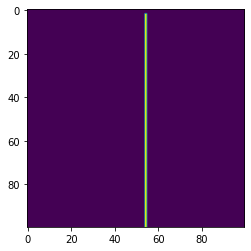

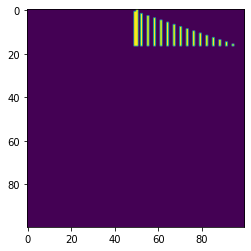

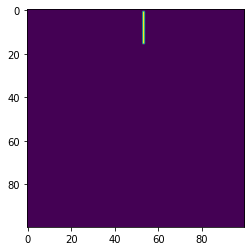

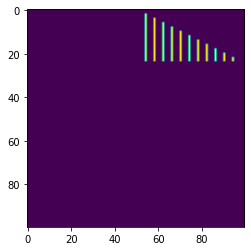

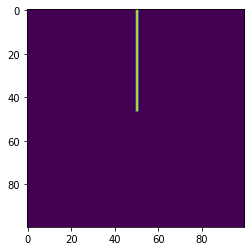

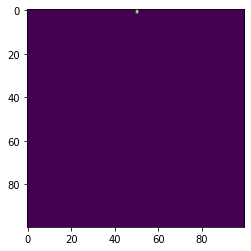

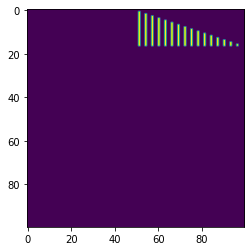

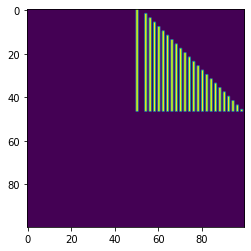

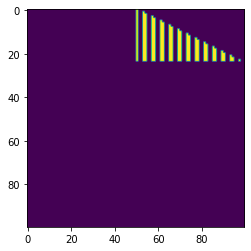

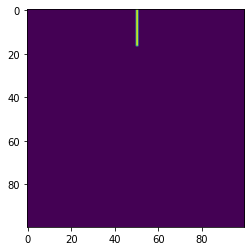

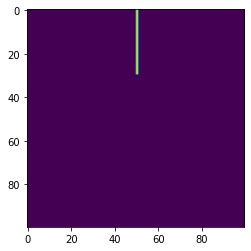

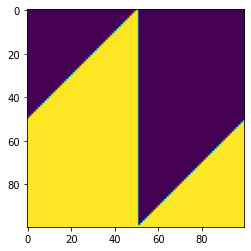

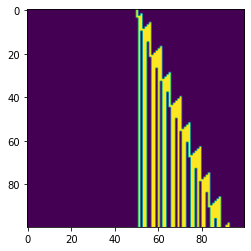

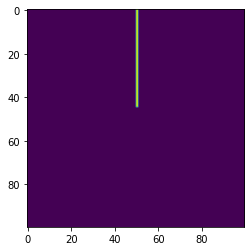

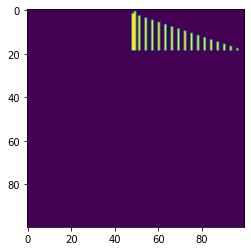

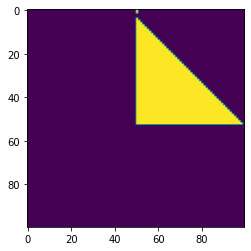

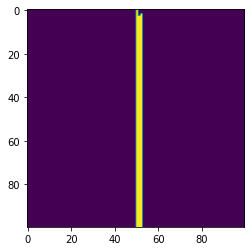

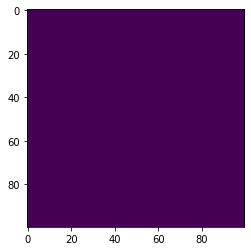

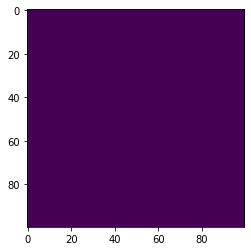

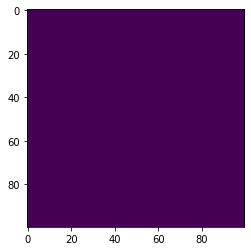

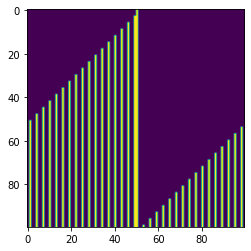

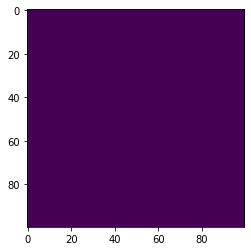

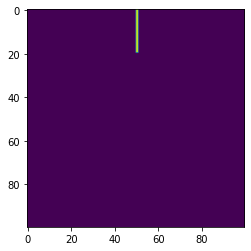

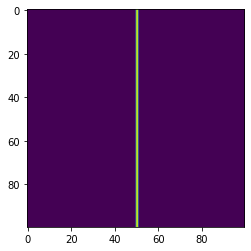

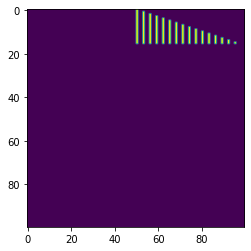

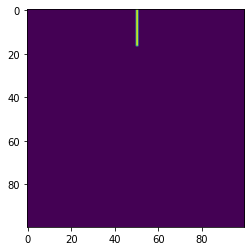

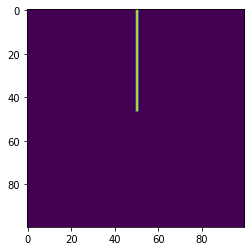

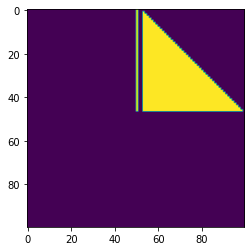

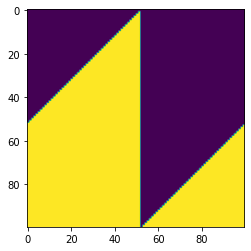

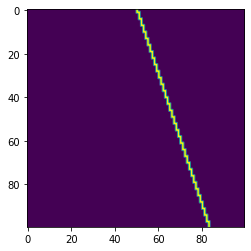

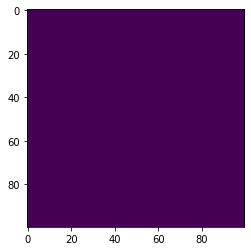

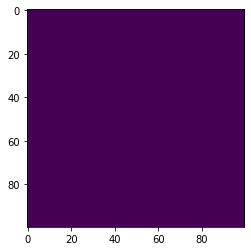

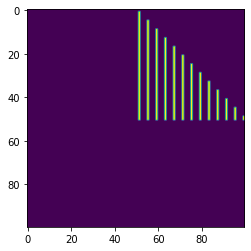

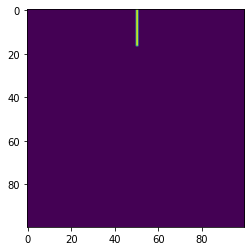

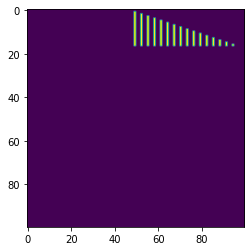

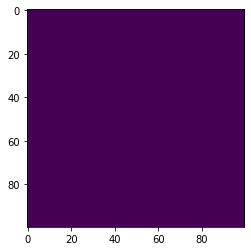

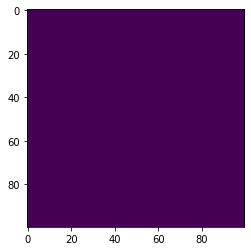

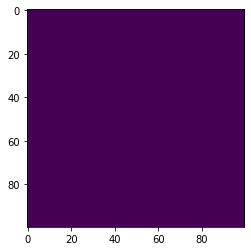

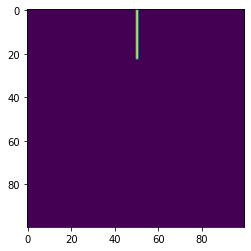

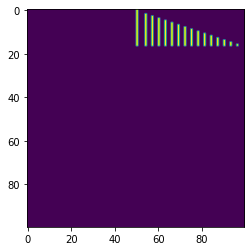

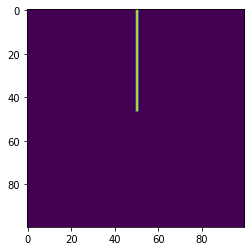

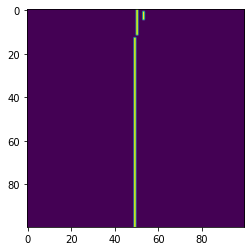

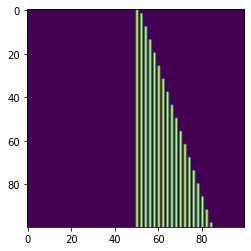

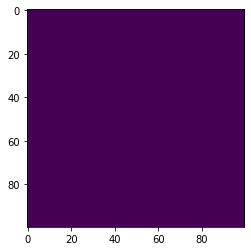

In [ ]:
for i in range(100):
    plt.imshow(RTM())
    plt.show()

In [ ]:
def RTM():

    M = np.random.randint(0,4,(4,4,4))

    state = 0
    i = N//2

    tape = np.zeros(N,).astype(int)
    tape[N//2] = 1

    # tape = (np.random.random(N,) > 0.5).astype(int)

    steps = 100
    T = np.zeros((steps,N)).astype(int)

    for step in range(steps):

        # print(tape,np.sum(tape*p))

        new_symbol = M[0][state][tape[i]]
        d          = M[1][state][tape[i]]
        new_state  = M[2][state][tape[i]]

        if new_symbol != b:
            tape[i] = new_symbol

        state = new_state
        i = i + (2*(d)-1)

        if np.abs(i) > N-1: 
            break

        T[step] = tape

    return T

In [ ]:
RTM()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

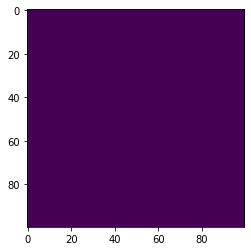

In [ ]:
plt.imshow(RTM())

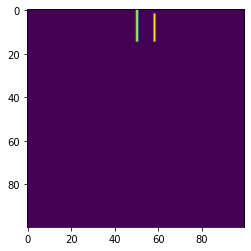

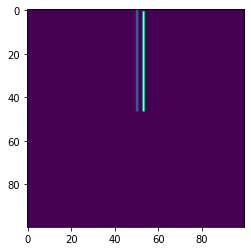

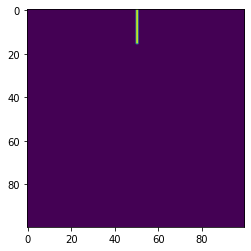

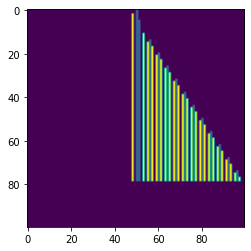

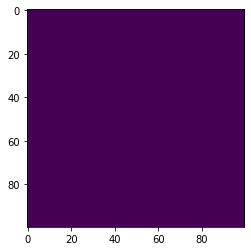

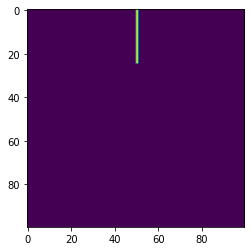

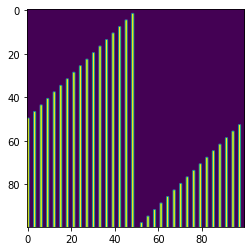

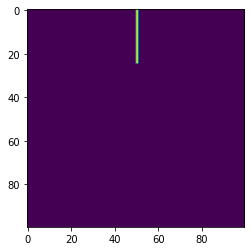

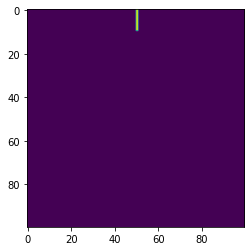

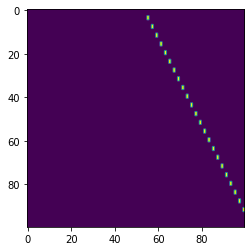

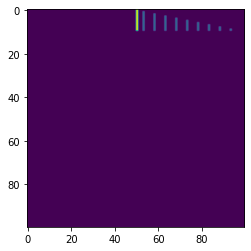

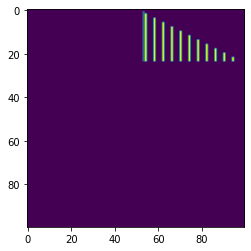

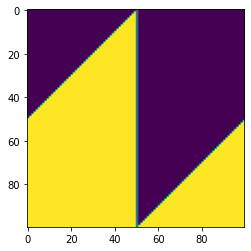

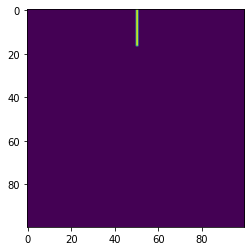

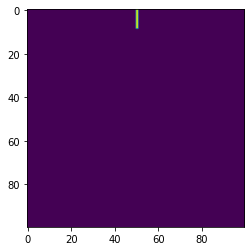

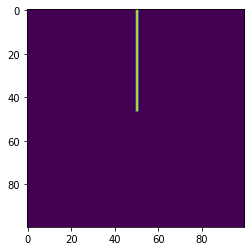

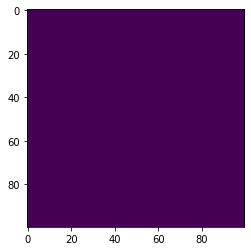

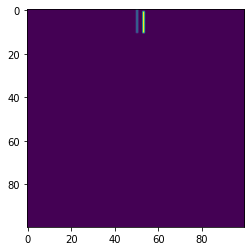

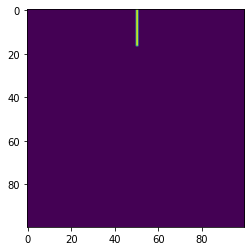

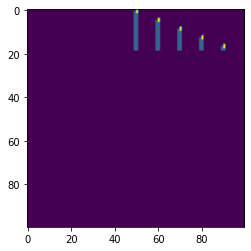

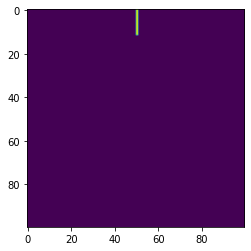

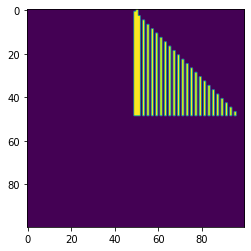

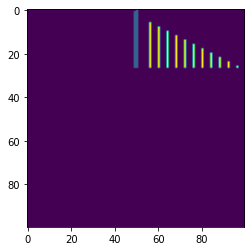

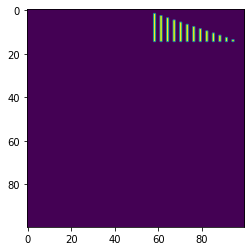

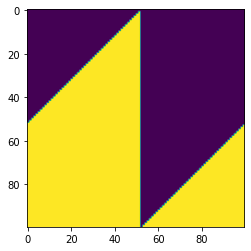

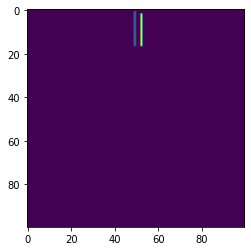

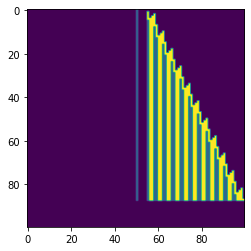

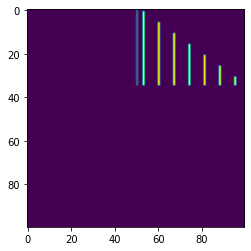

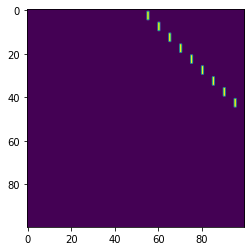

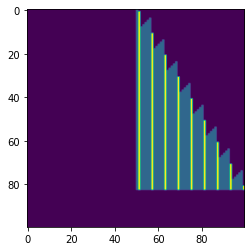

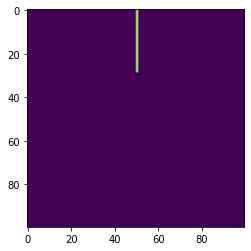

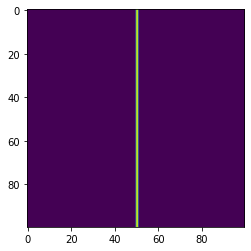

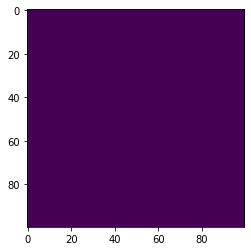

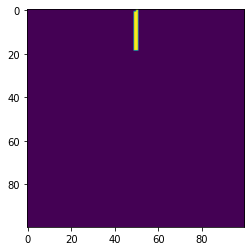

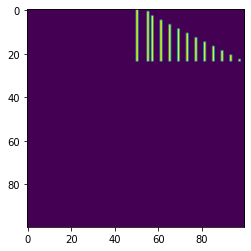

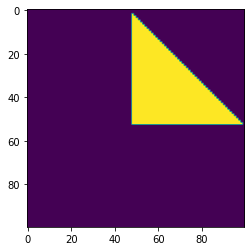

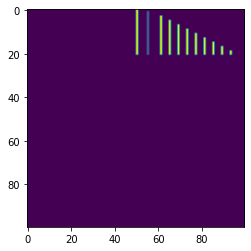

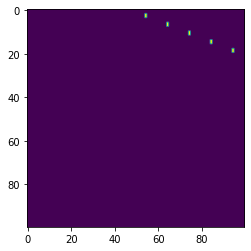

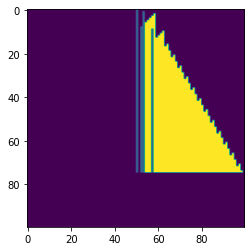

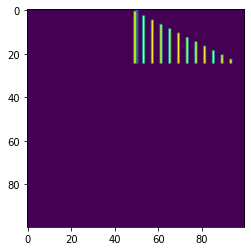

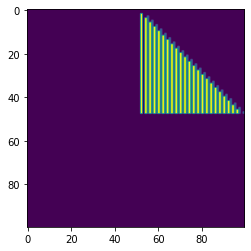

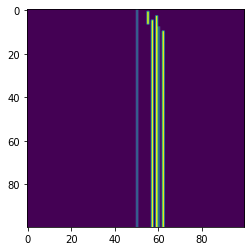

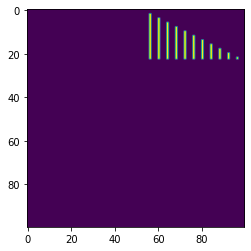

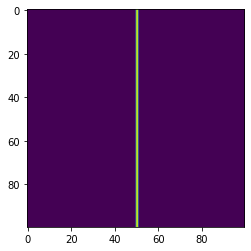

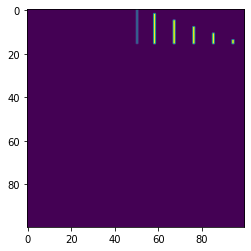

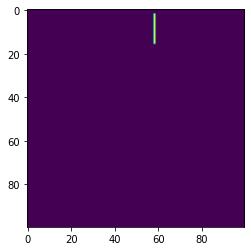

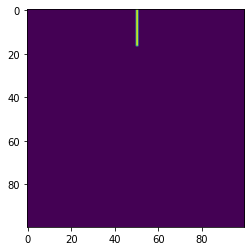

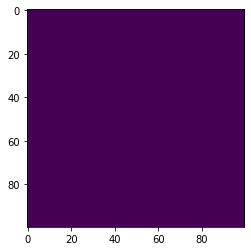

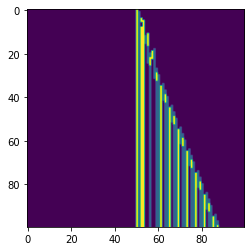

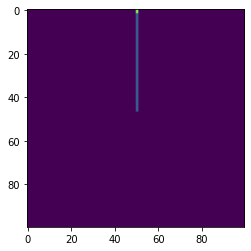

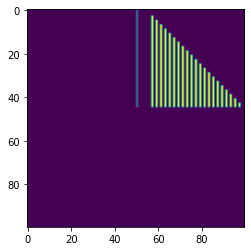

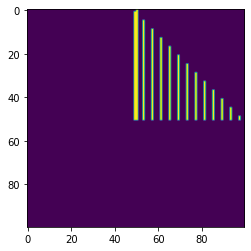

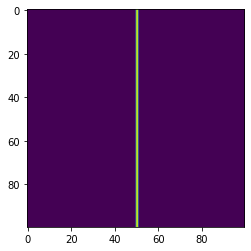

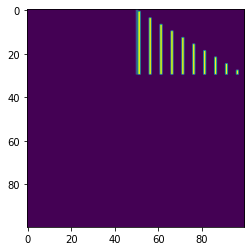

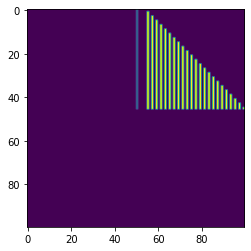

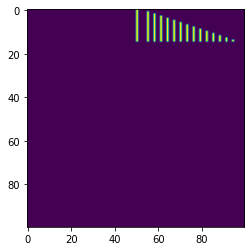

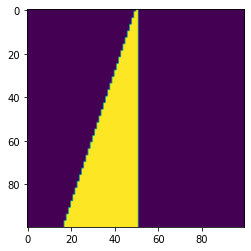

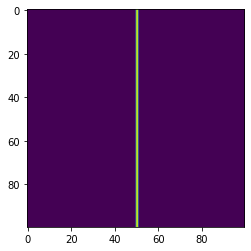

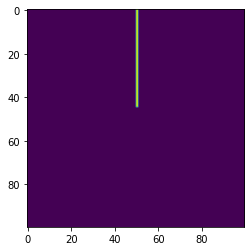

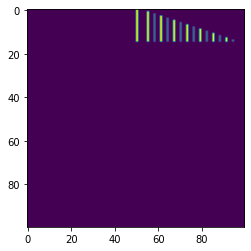

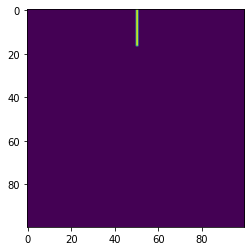

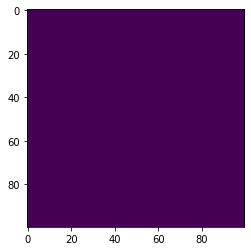

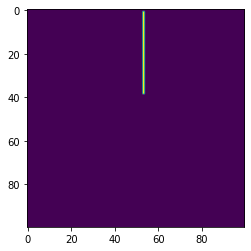

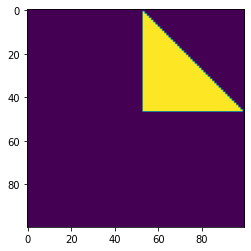

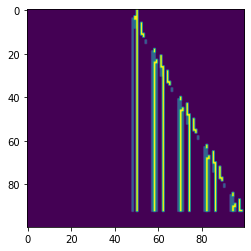

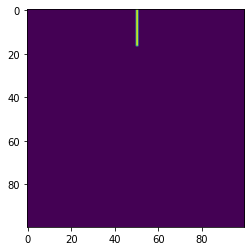

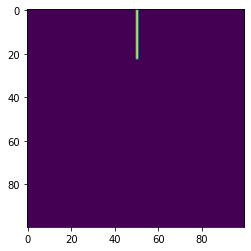

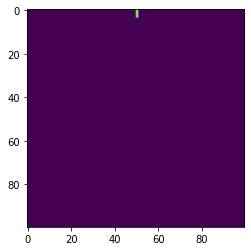

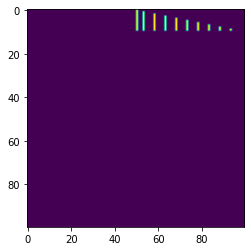

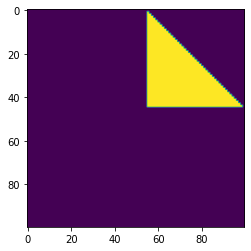

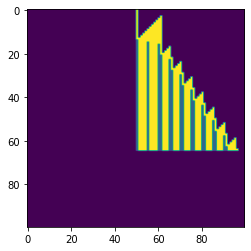

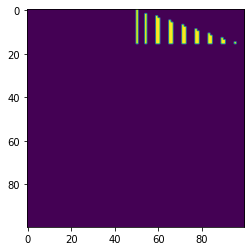

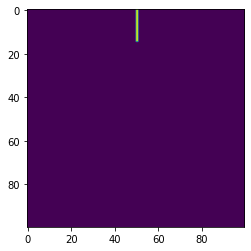

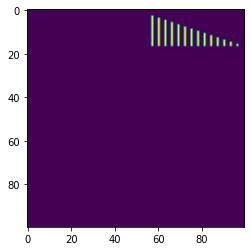

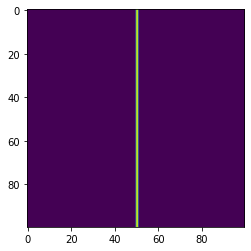

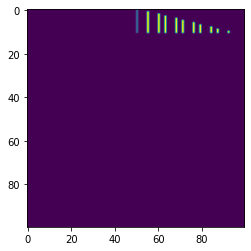

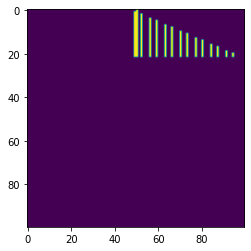

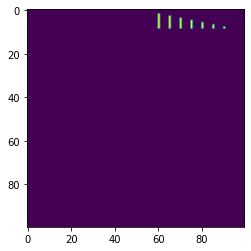

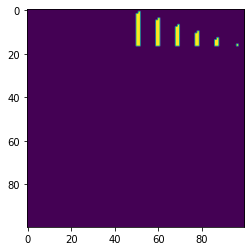

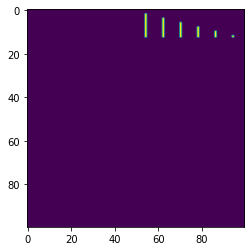

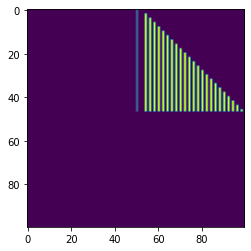

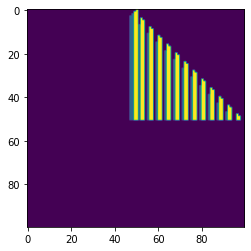

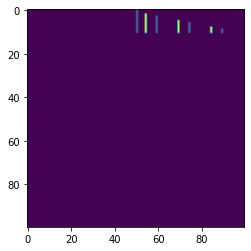

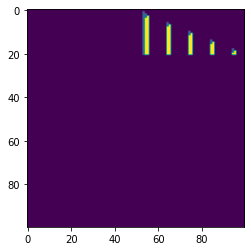

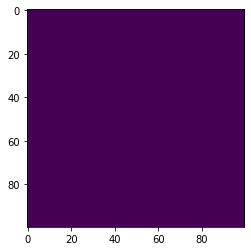

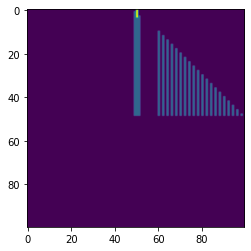

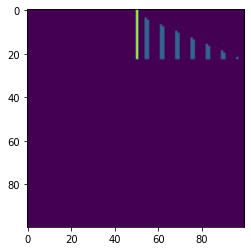

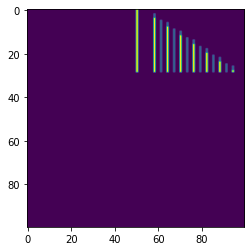

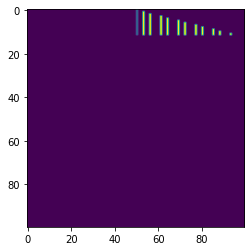

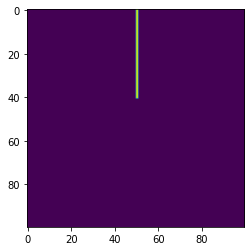

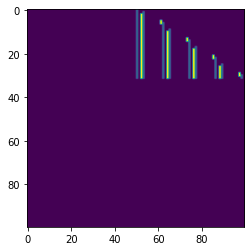

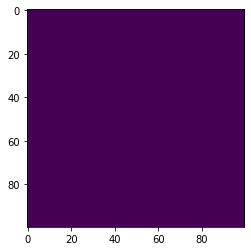

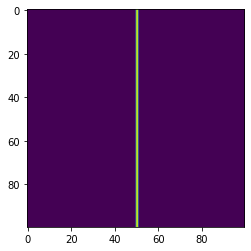

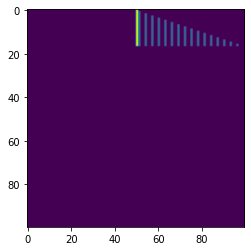

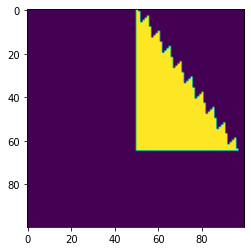

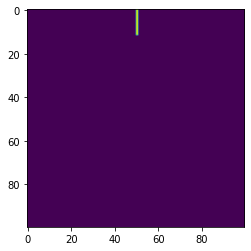

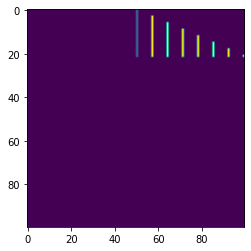

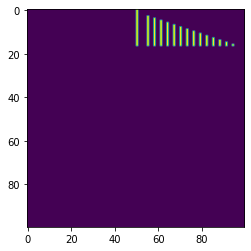

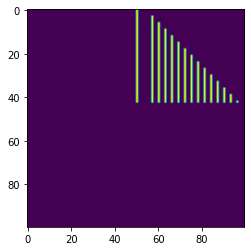

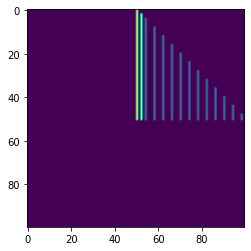

In [ ]:
for i in range(100):
    plt.imshow(RTM())
    plt.show()

In [ ]:
(2*(1)-1)

1

In [ ]:
def RTM():

    a = 3 

    M = np.random.randint(0,a,(a,a,a))

    state = 0
    i = N//2

    tape = np.zeros(N,).astype(int)
    tape[N//2] = 1

    # tape = (np.random.random(N,) > 0.5).astype(int)
    # tape = np.random.randint(0,a,(N,))

    steps = 100
    T = np.zeros((steps,N)).astype(int)

    for step in range(steps):

        # print(tape,np.sum(tape*p))

        new_symbol = M[0][state][tape[i]]
        d          = M[1][state][tape[i]]
        new_state  = M[2][state][tape[i]]

        tape[i] = new_symbol
        state = new_state
        i = i + (2*(d)-1)

        if np.abs(i) > N-1: 
            break

        T[step] = tape

    return T

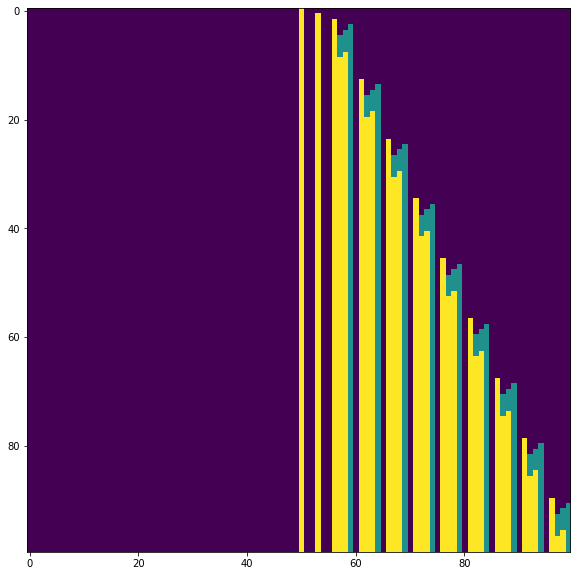

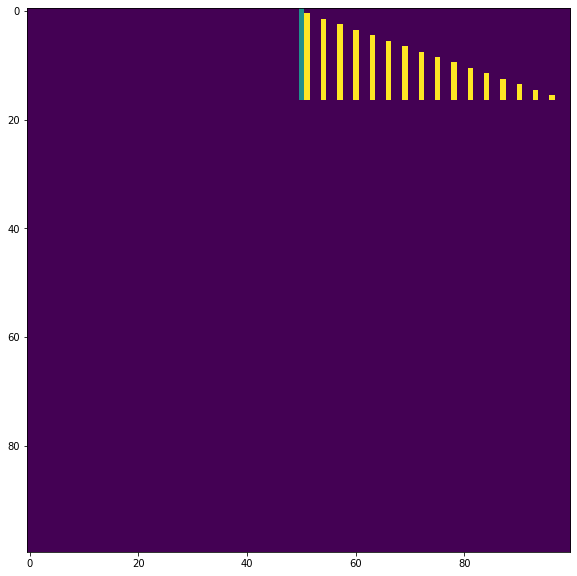

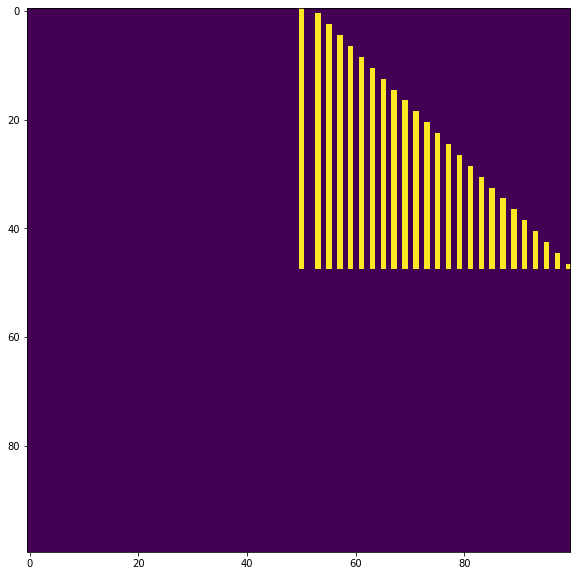

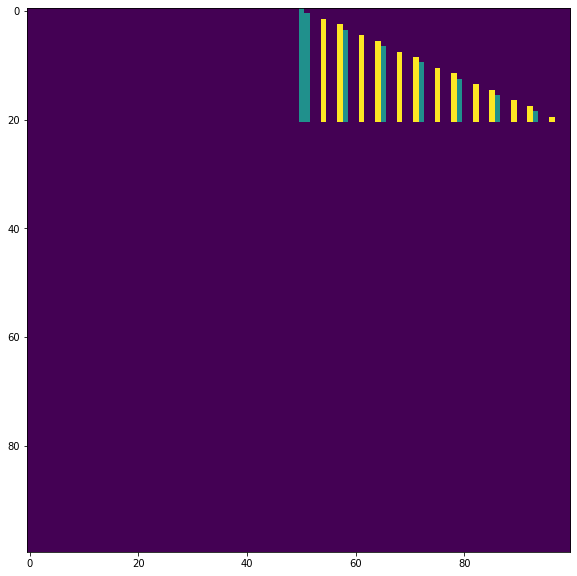

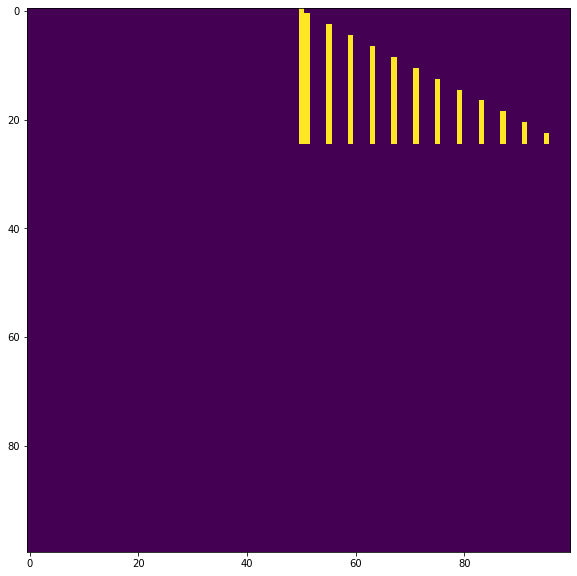

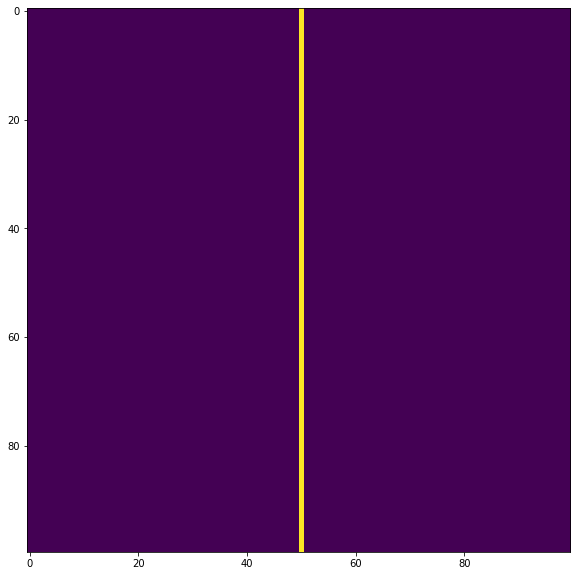

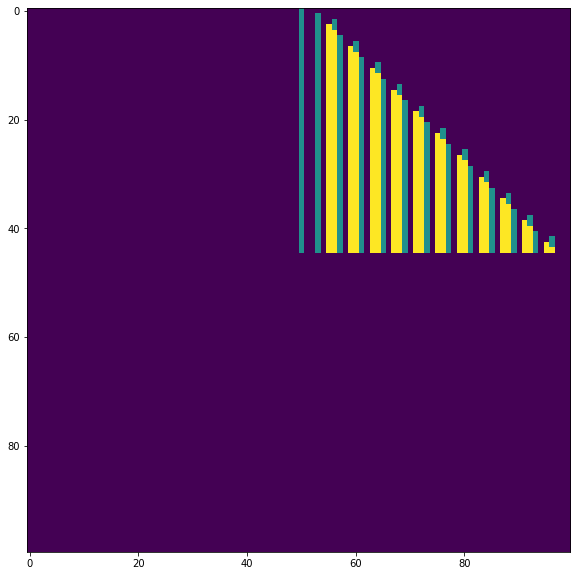

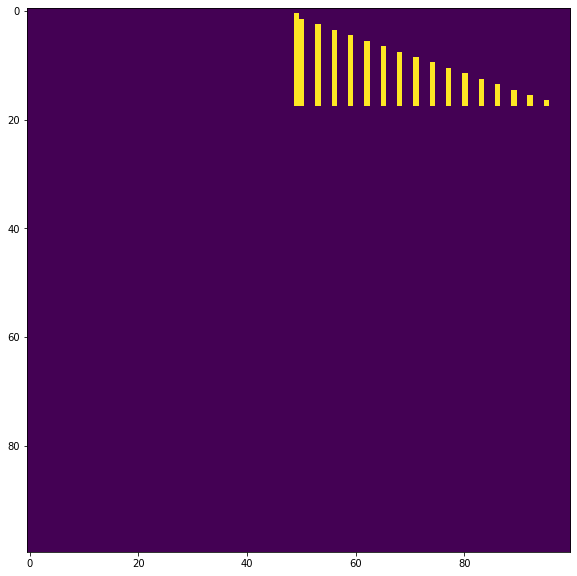

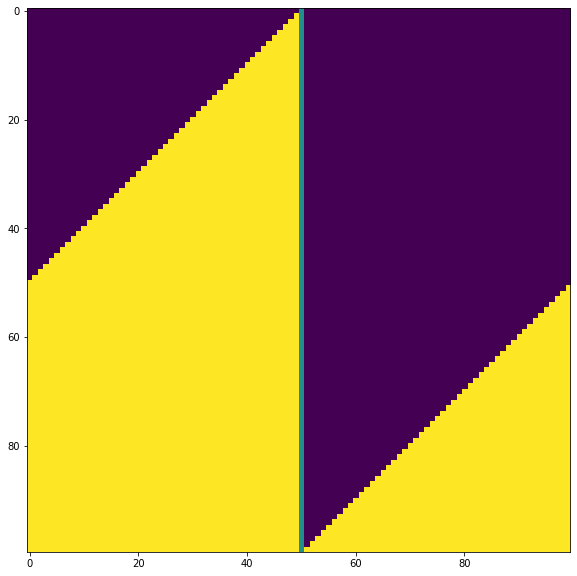

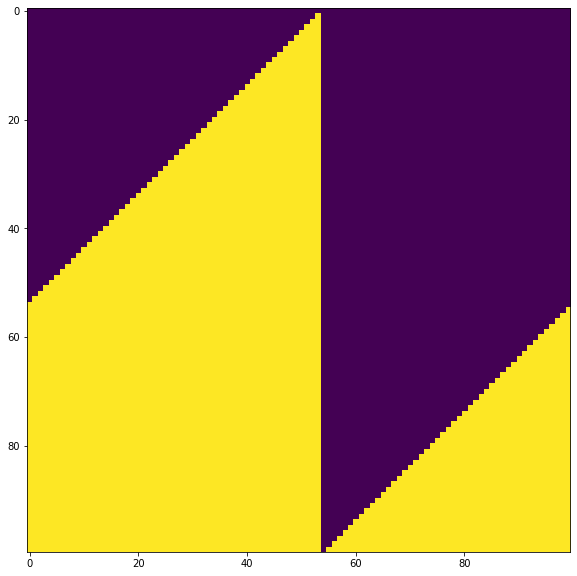

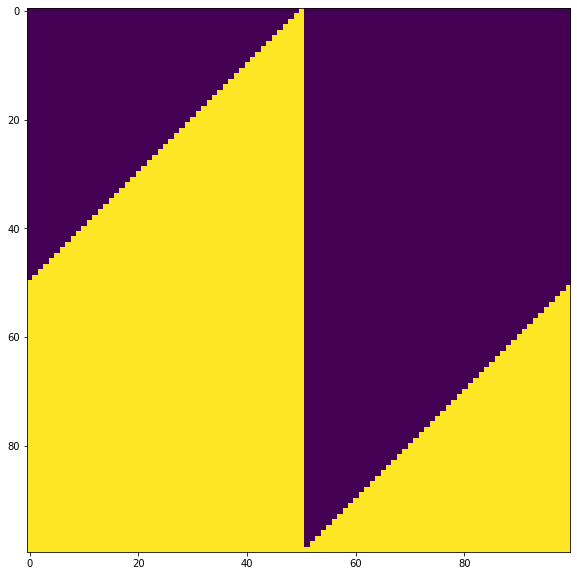

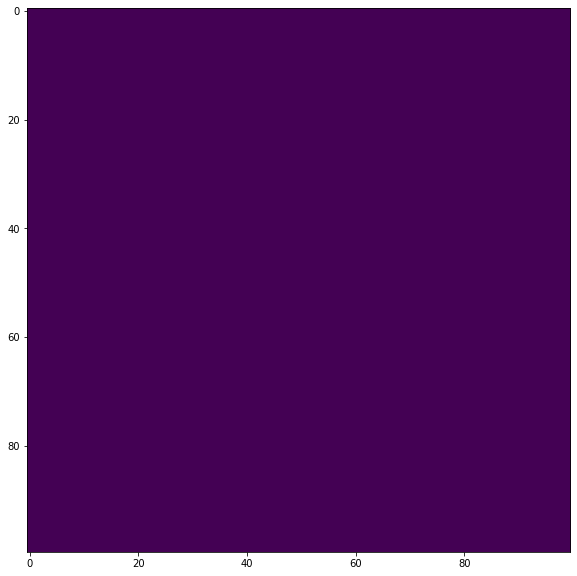

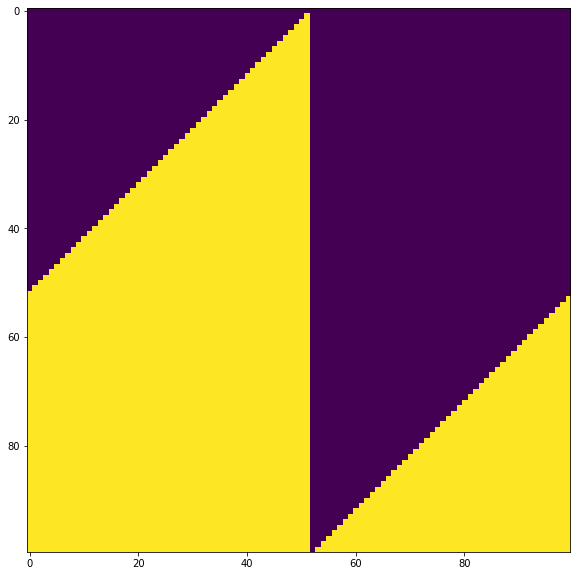

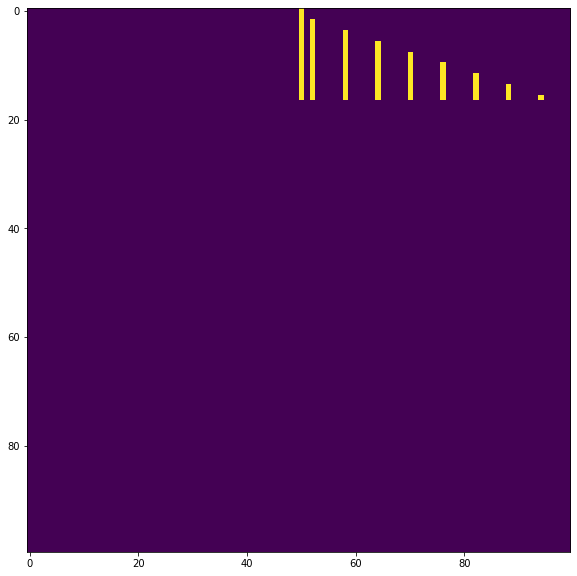

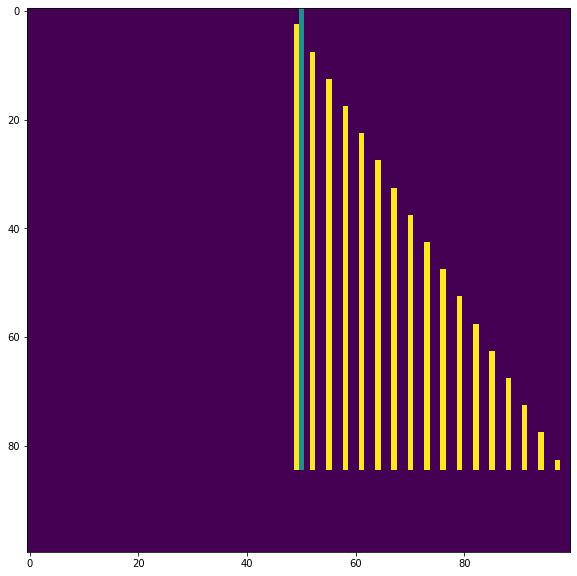

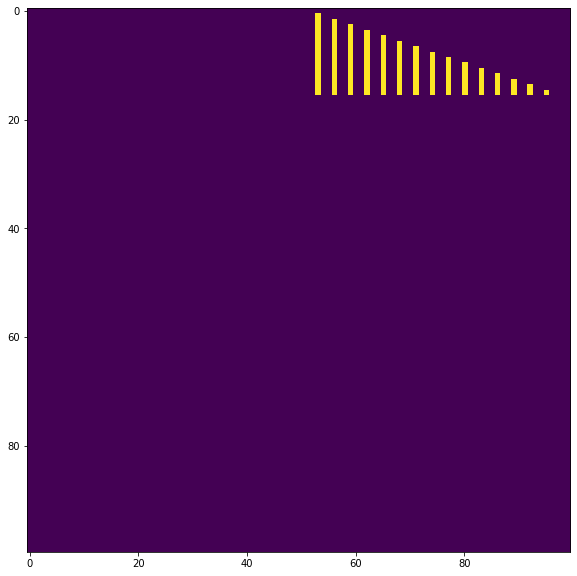

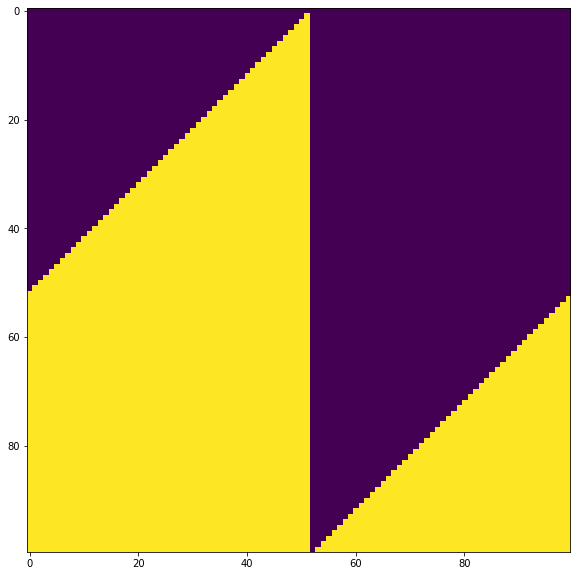

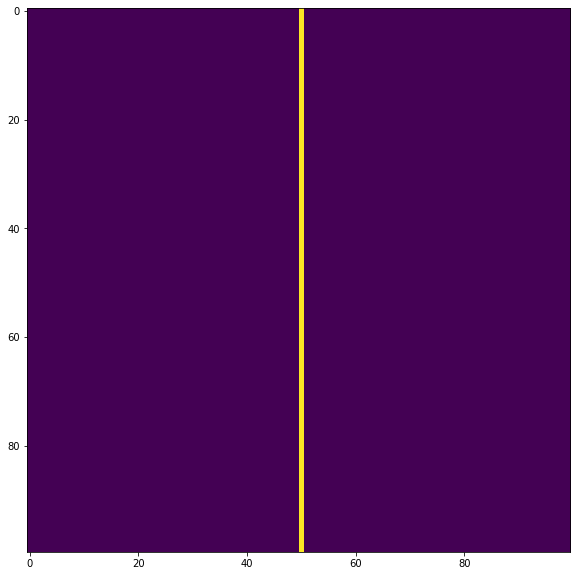

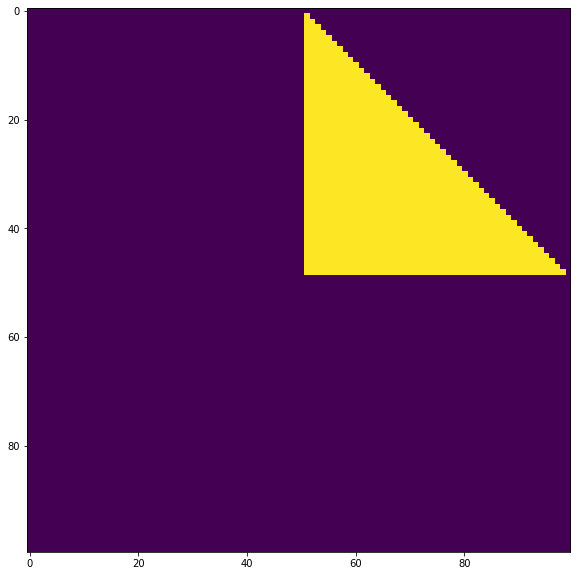

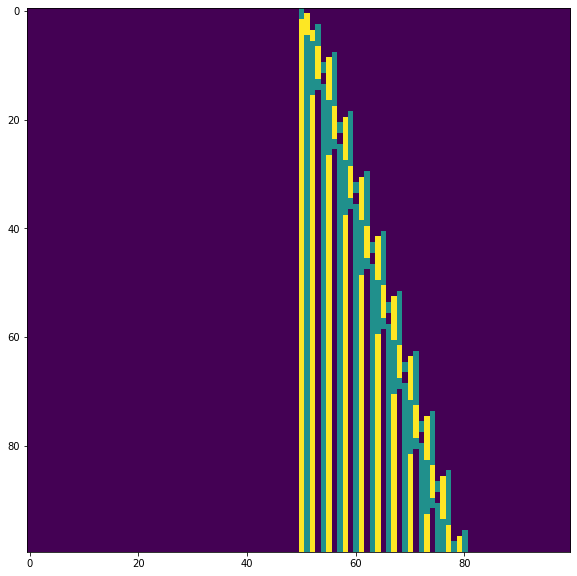

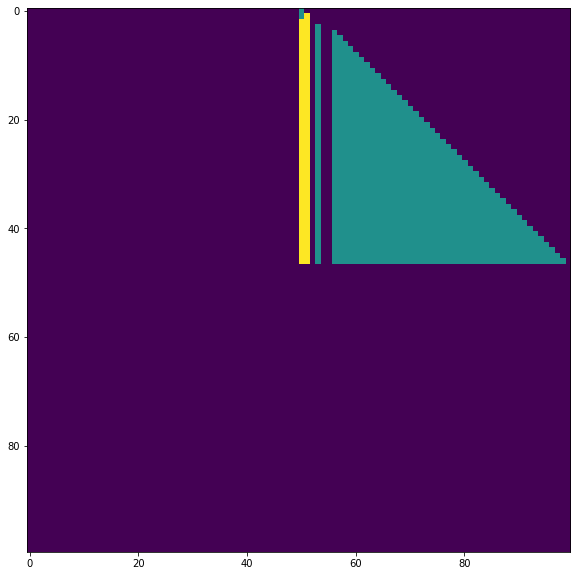

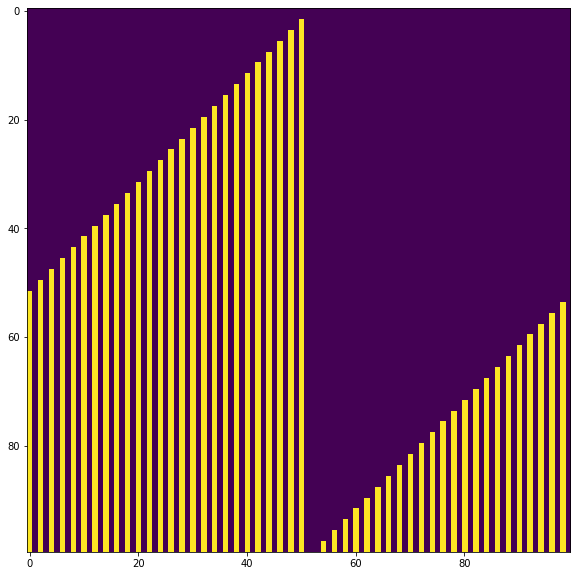

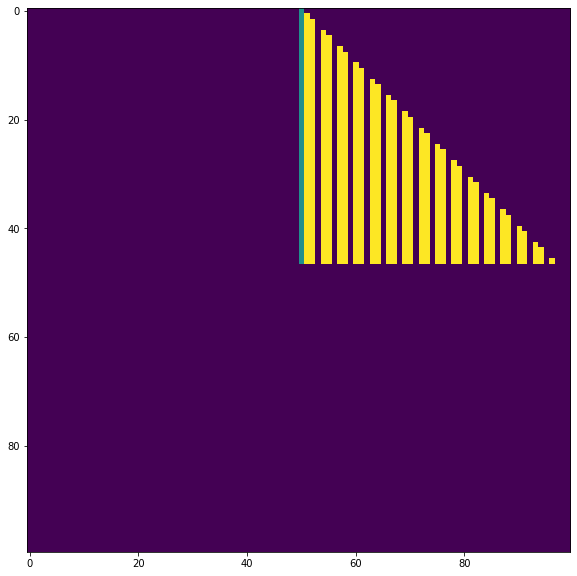

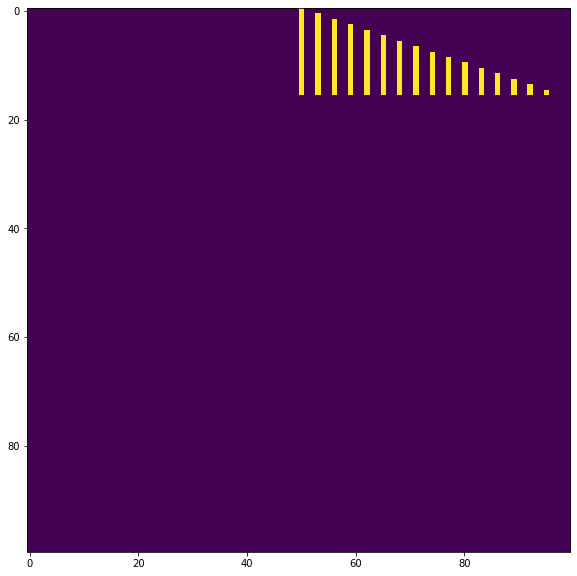

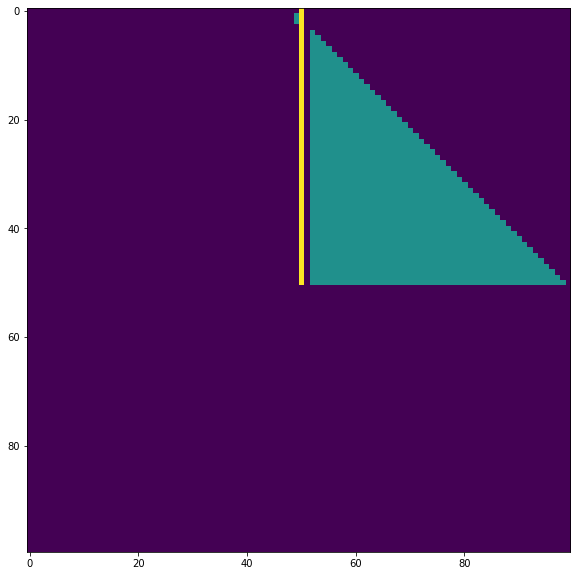

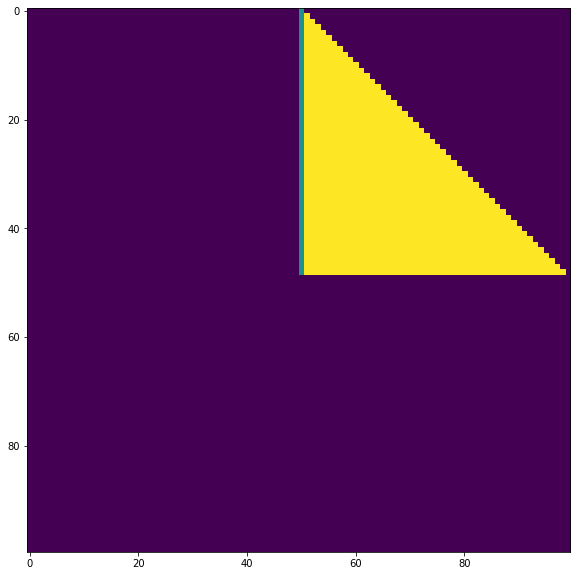

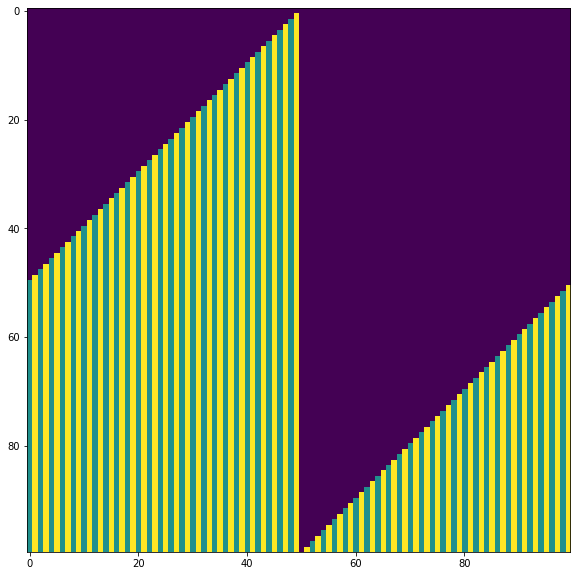

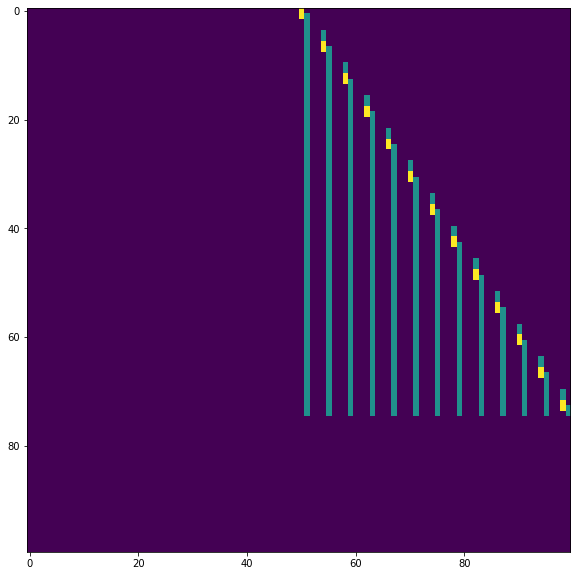

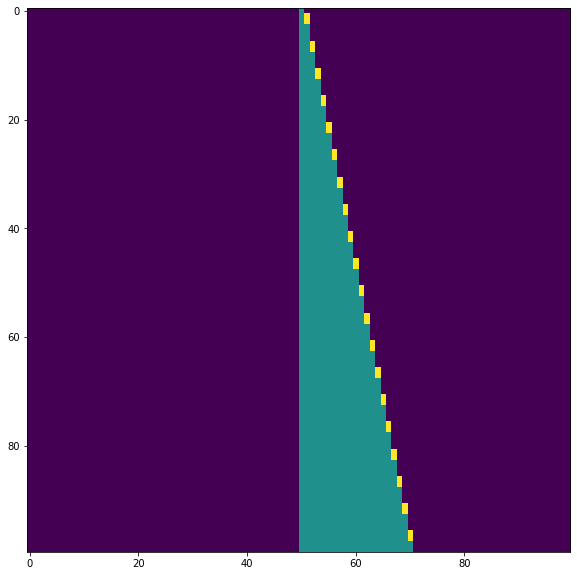

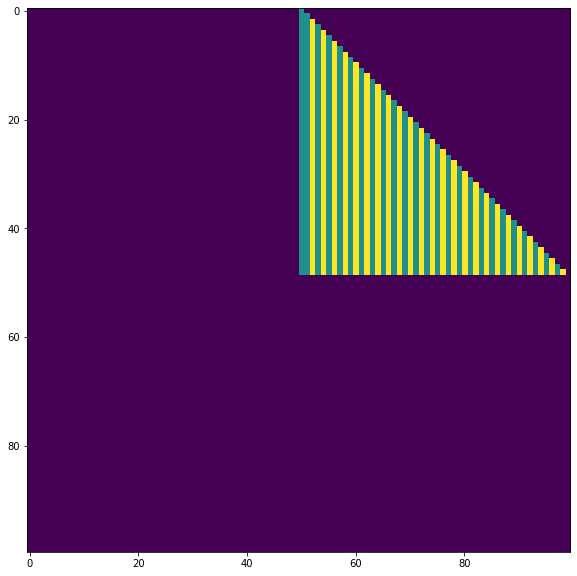

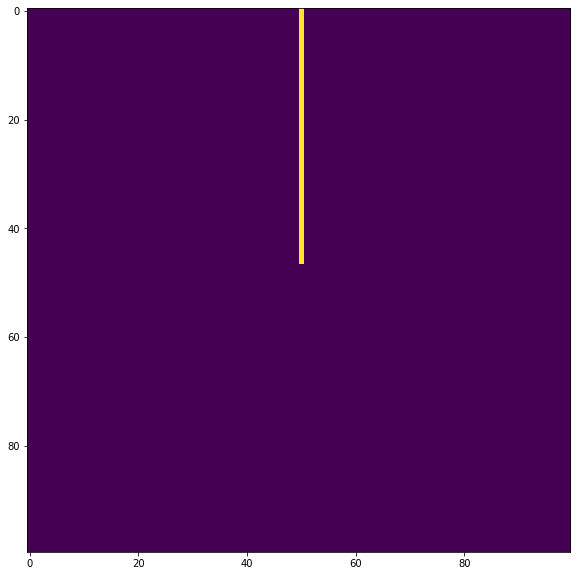

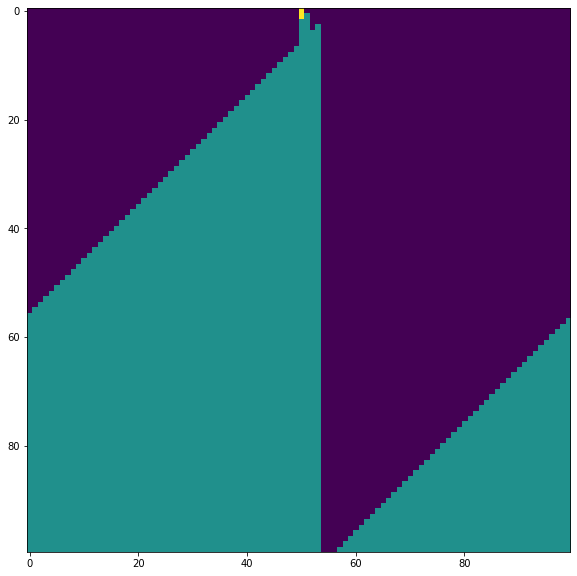

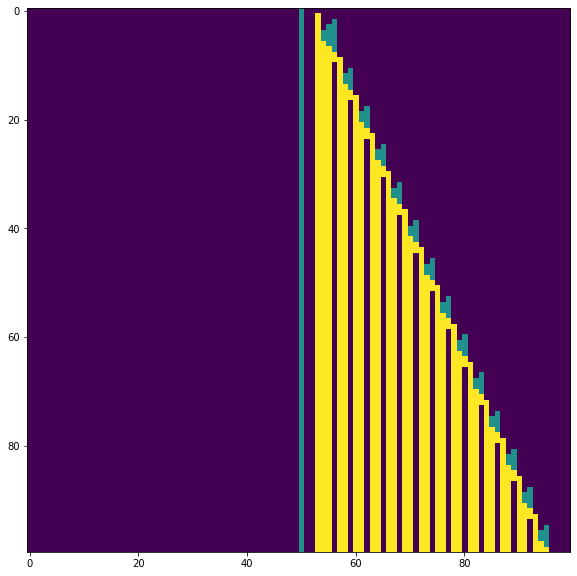

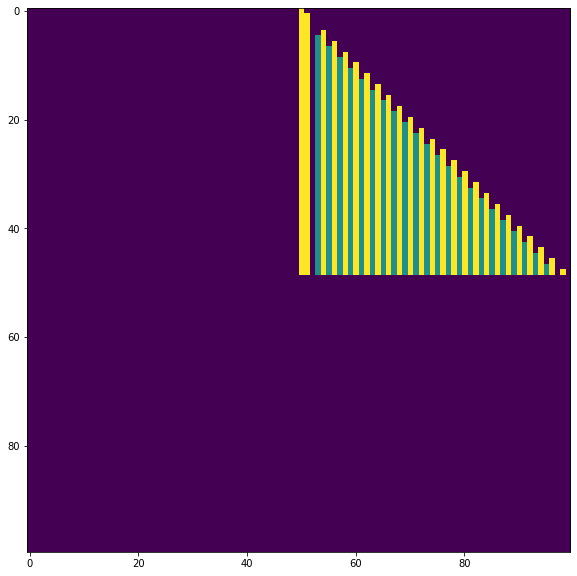

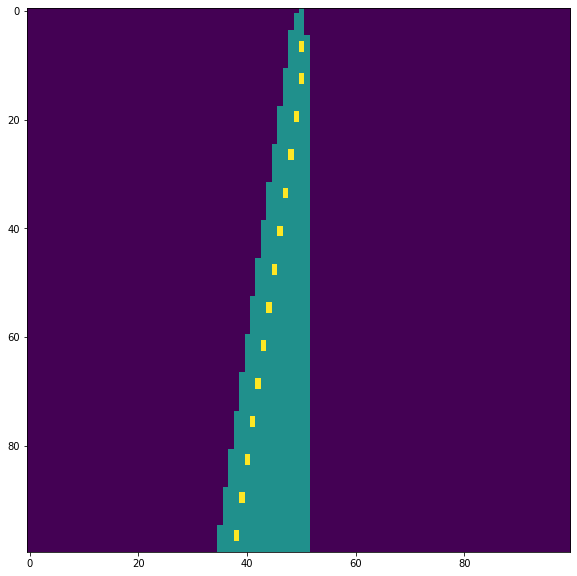

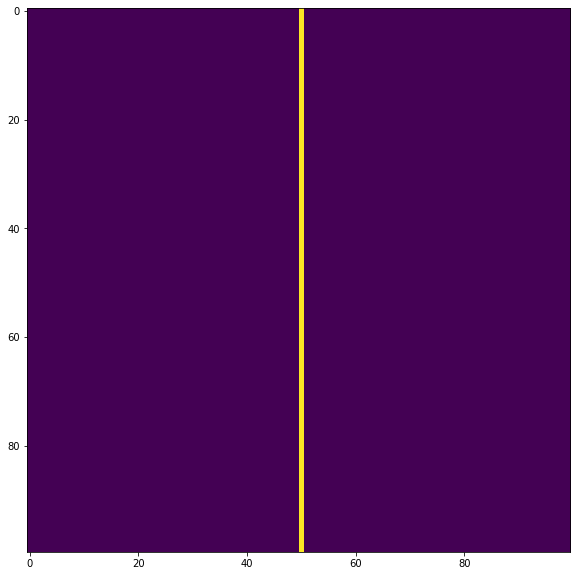

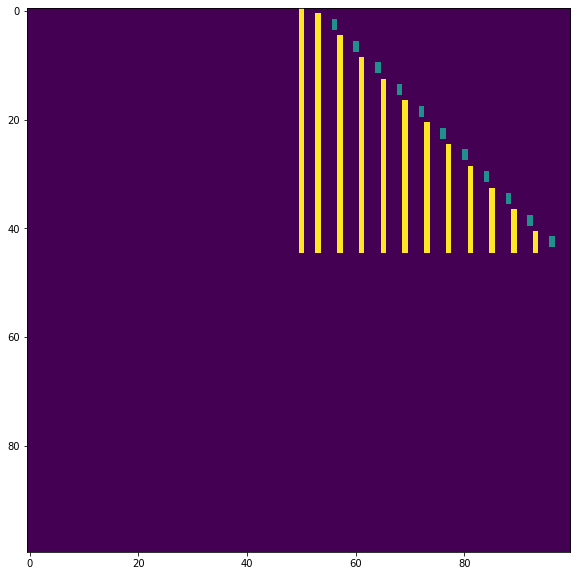

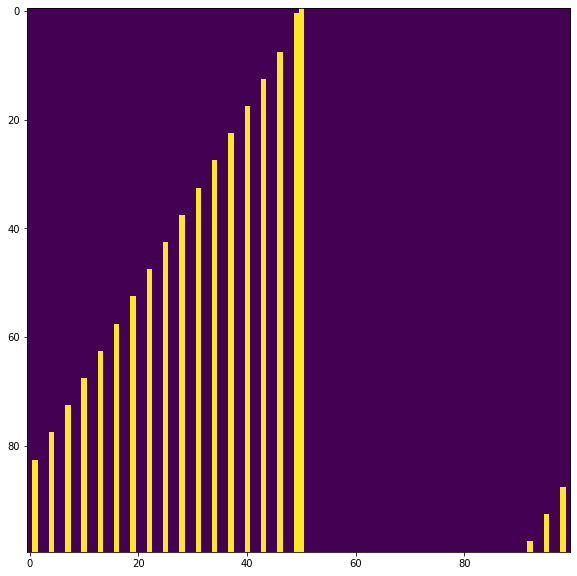

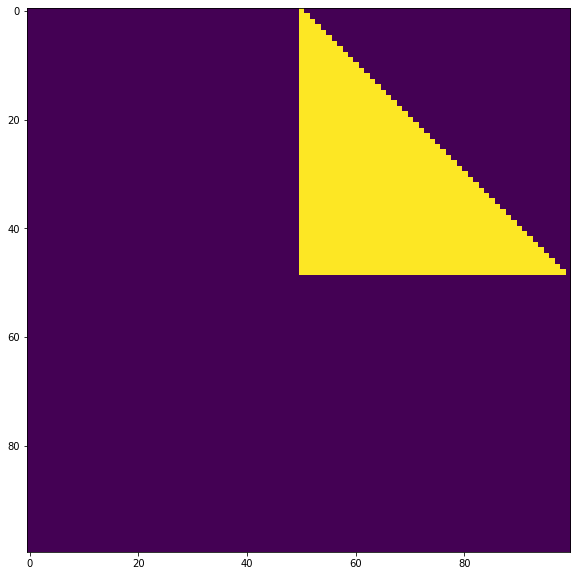

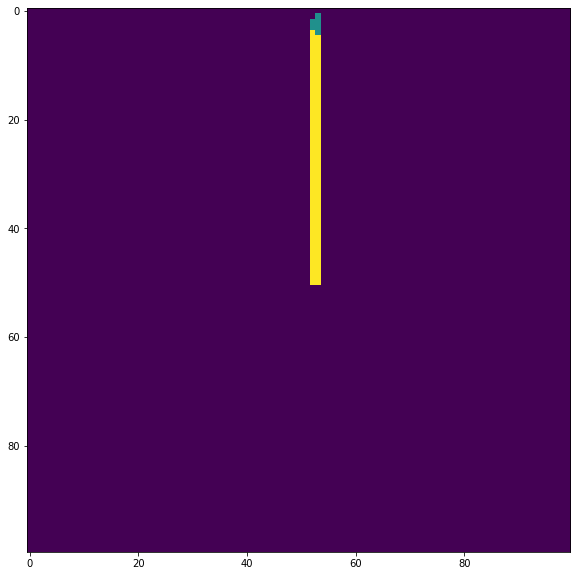

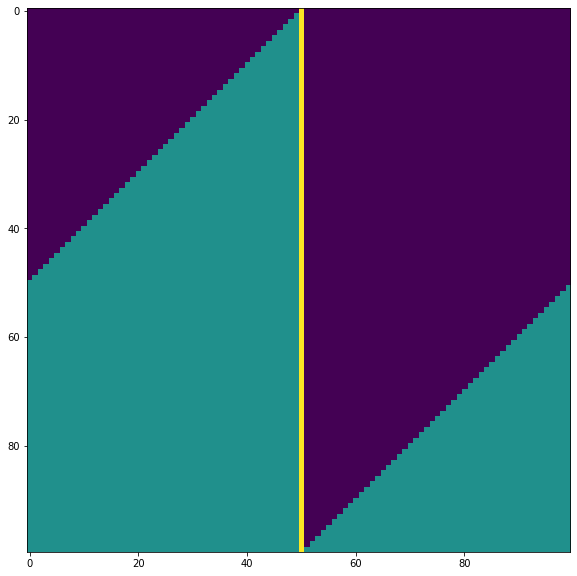

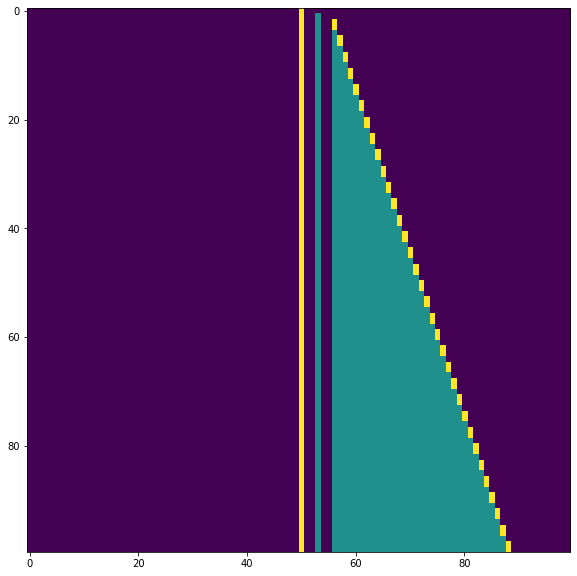

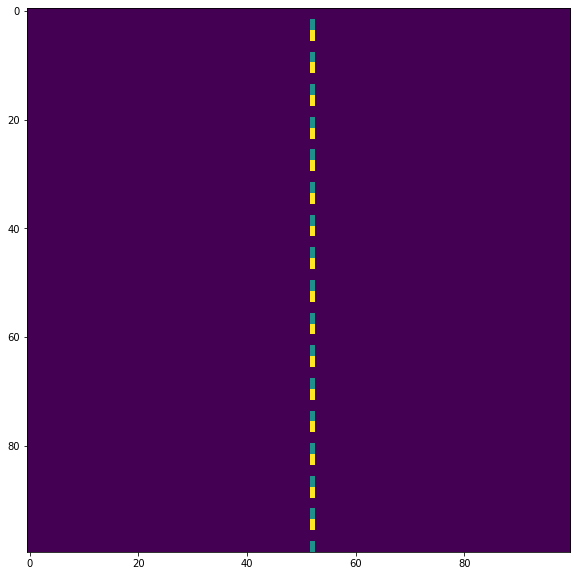

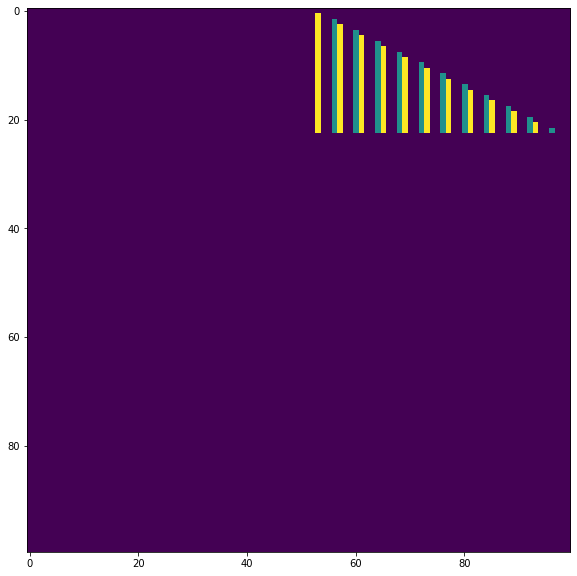

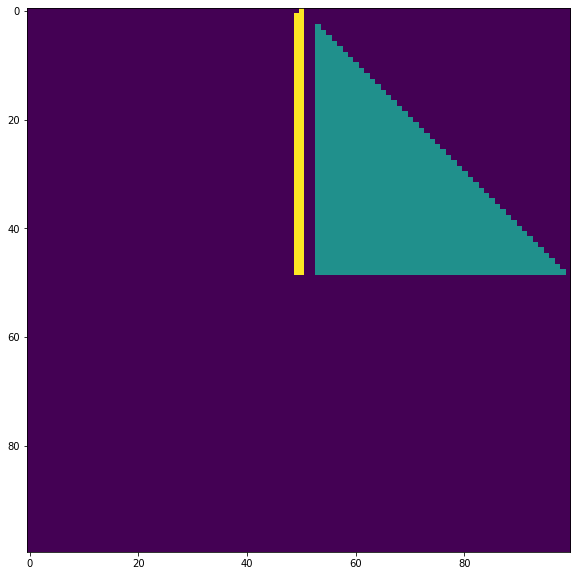

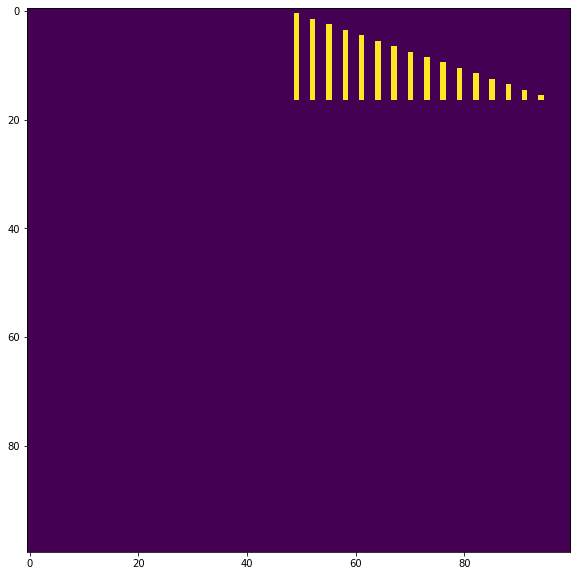

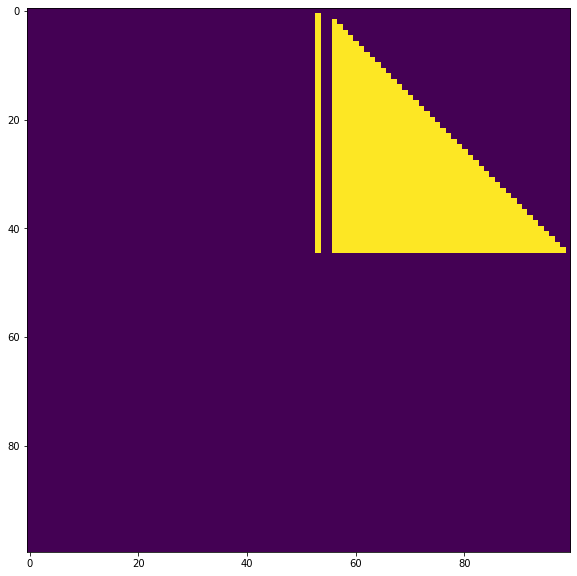

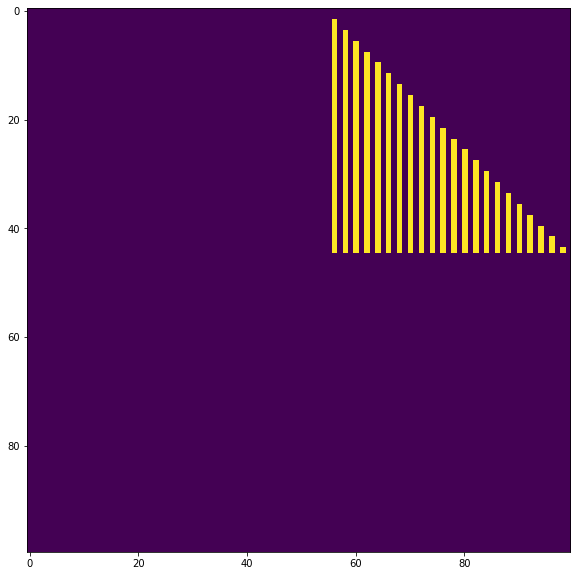

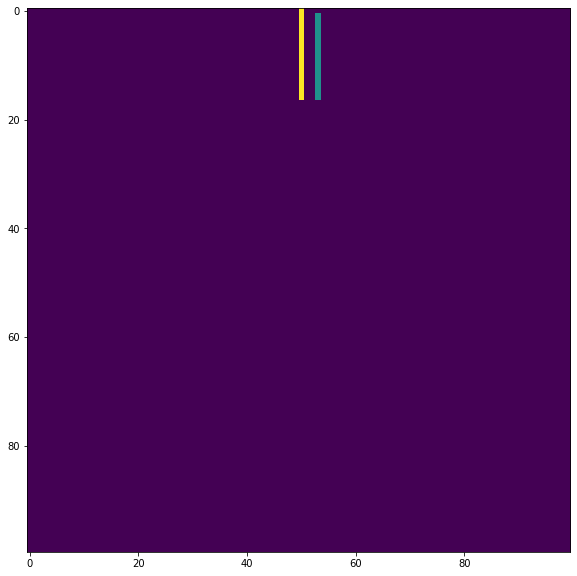

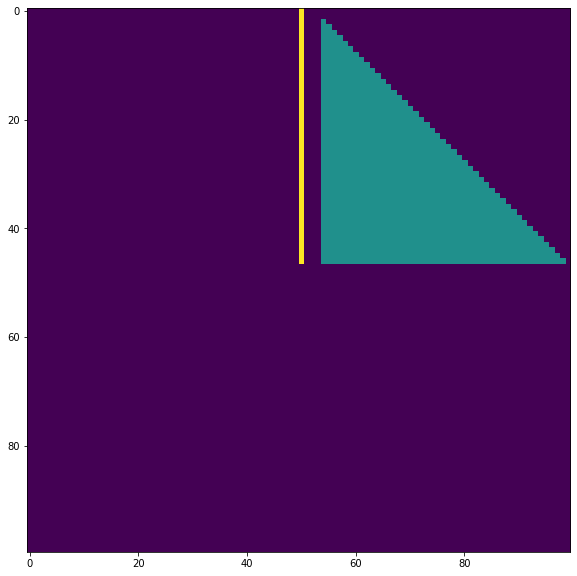

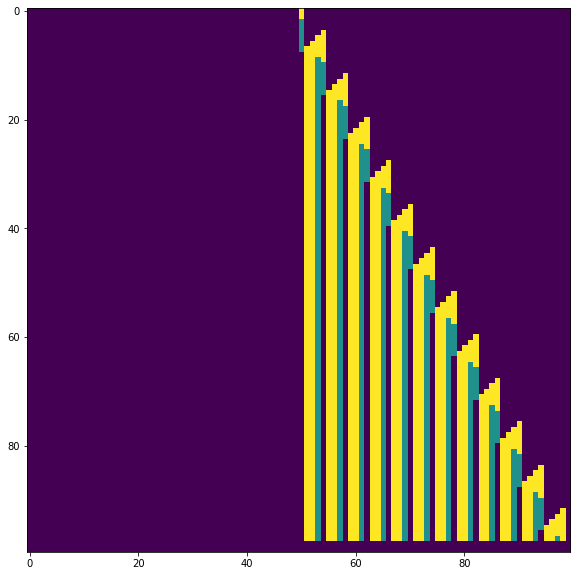

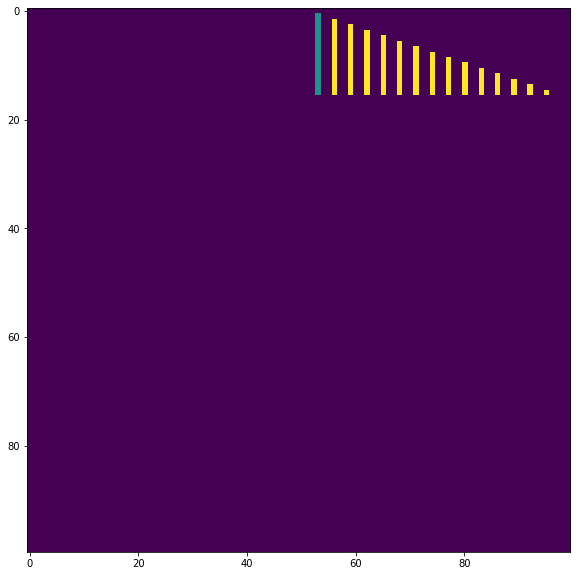

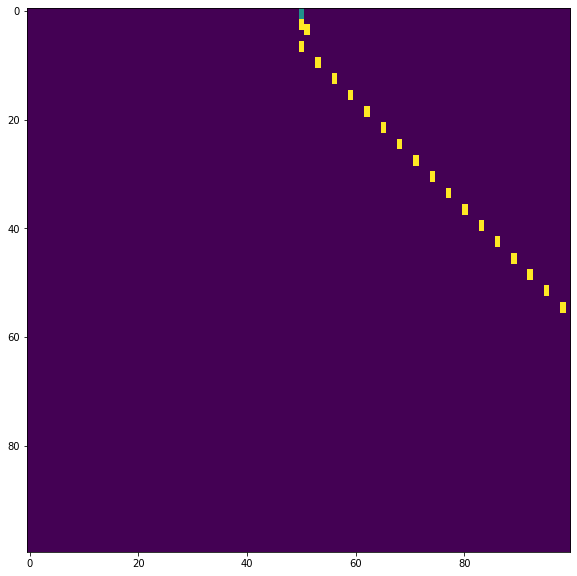

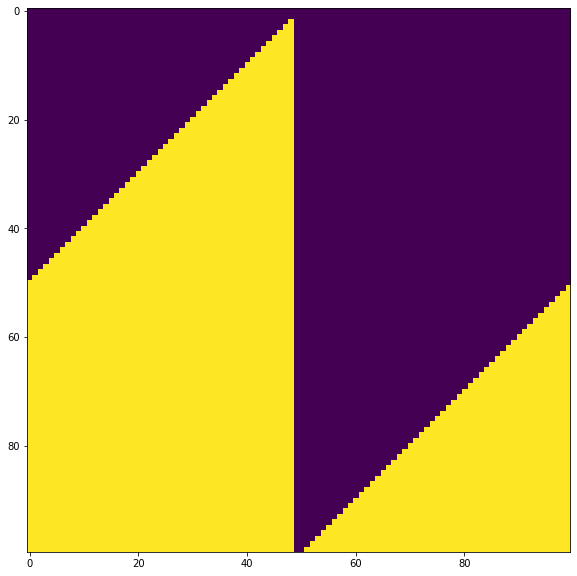

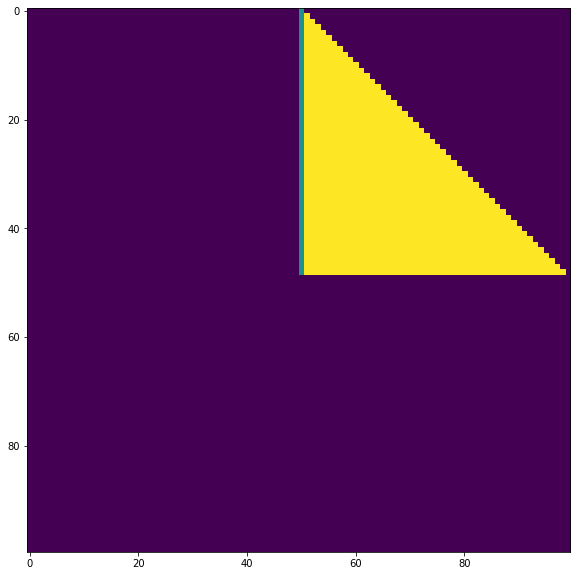

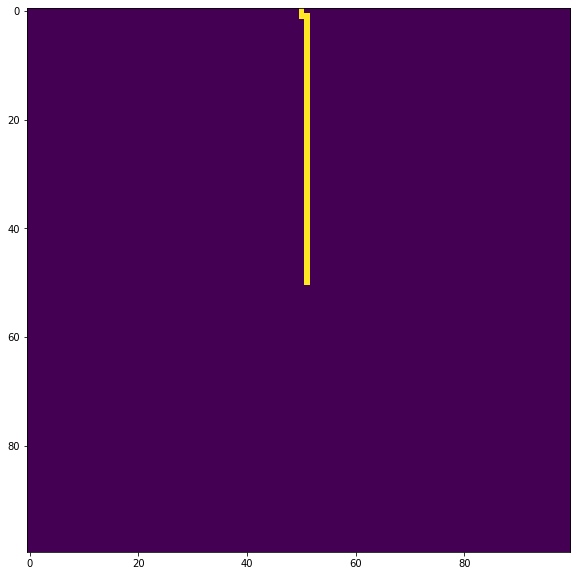

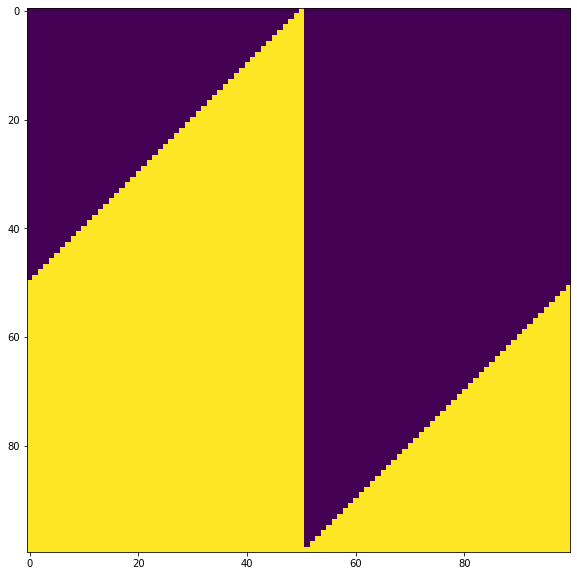

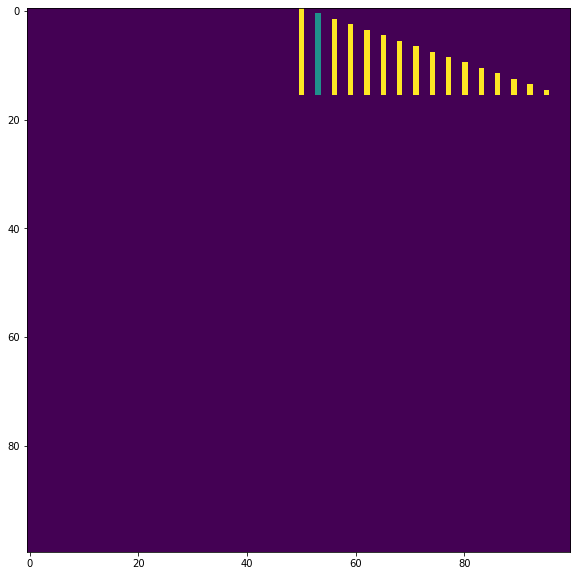

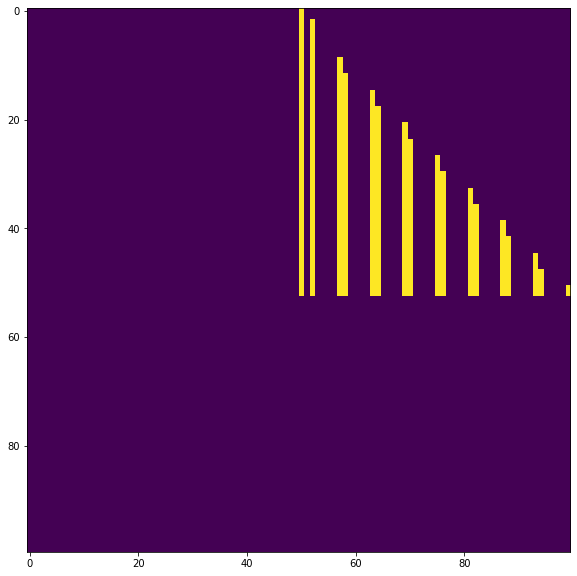

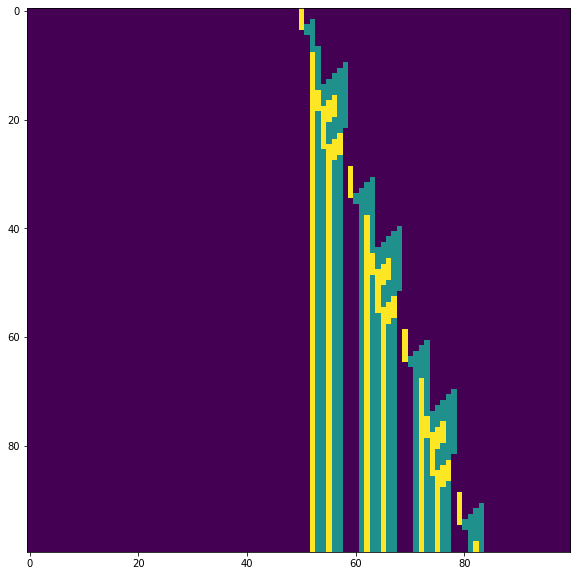

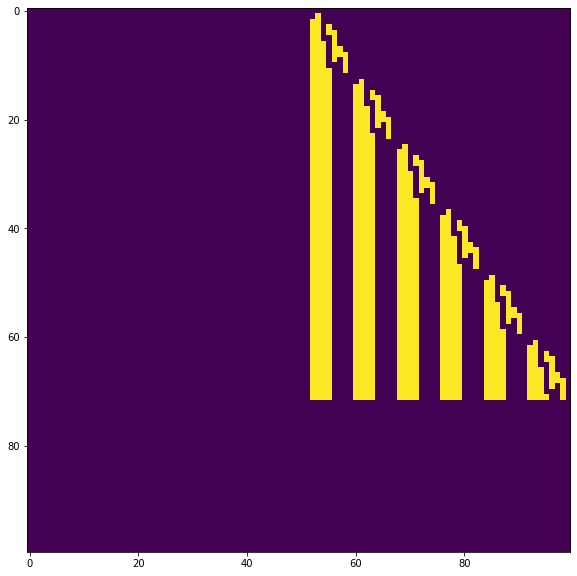

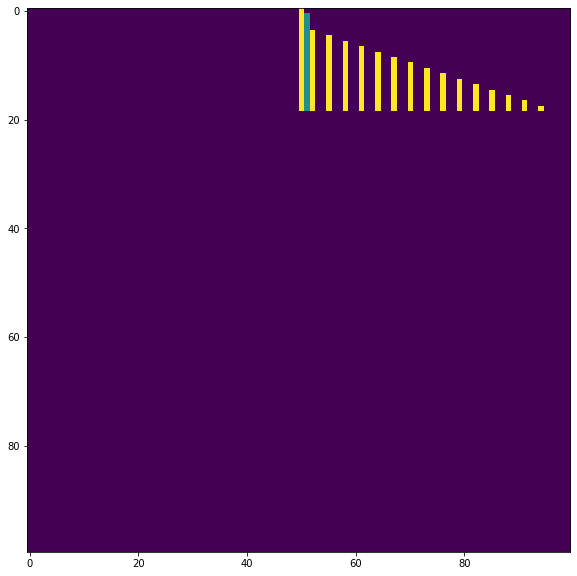

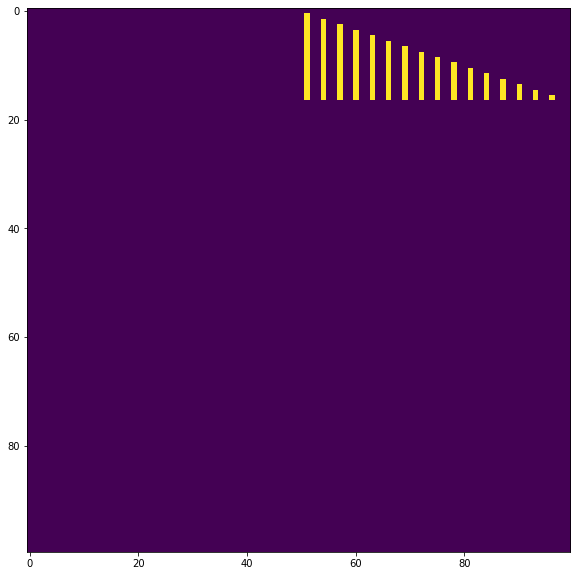

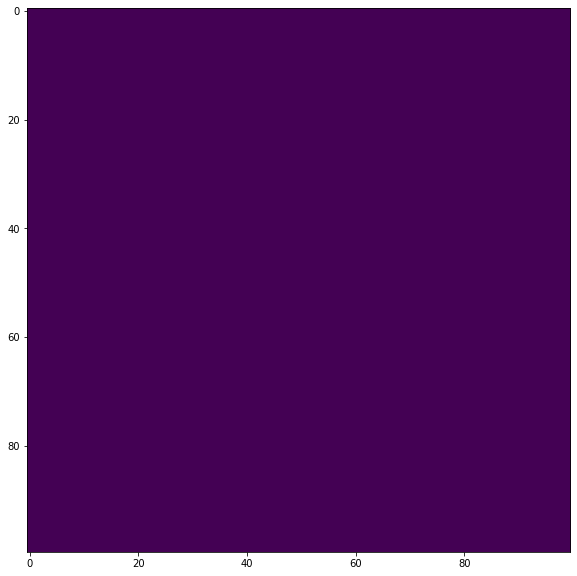

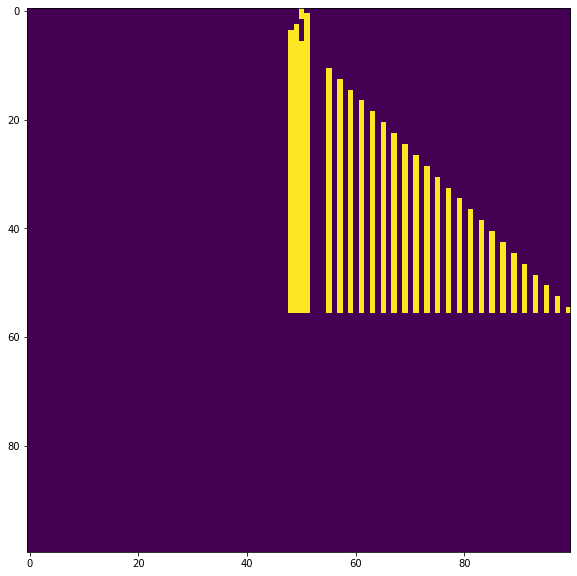

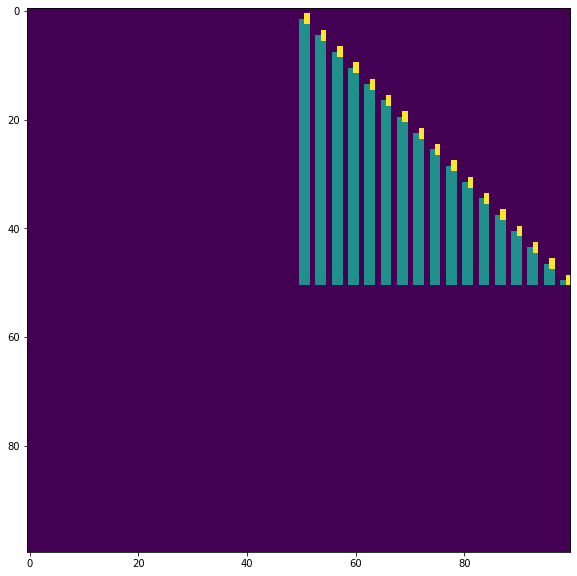

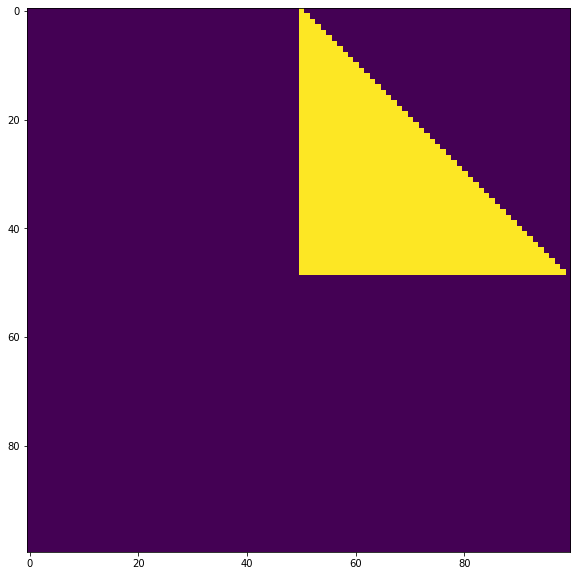

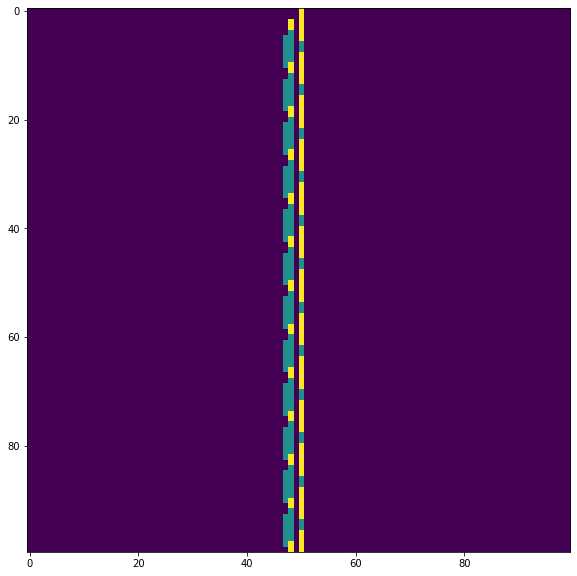

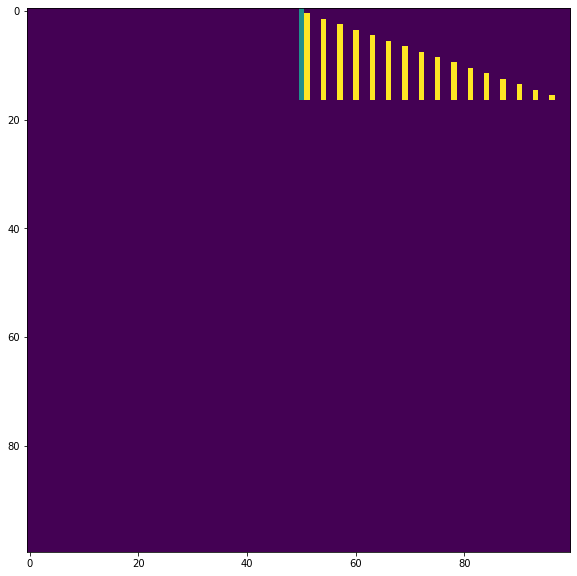

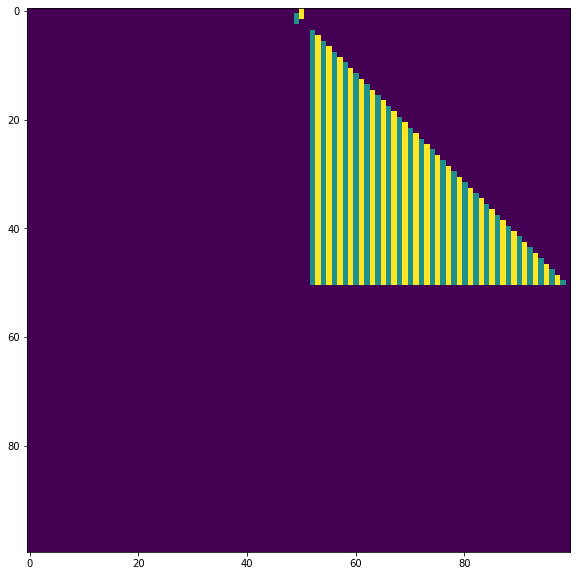

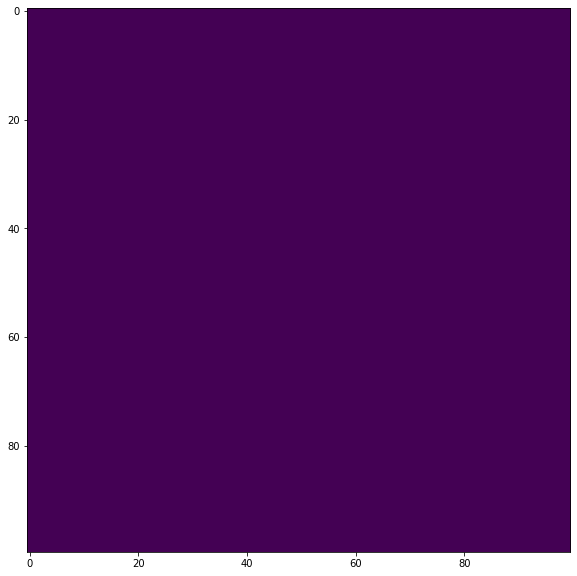

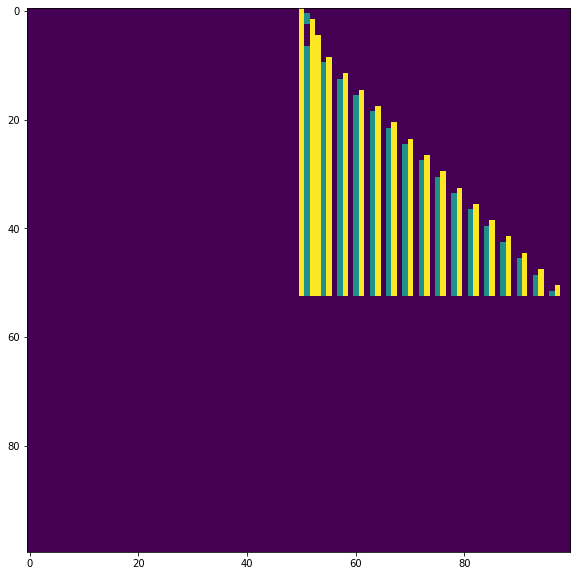

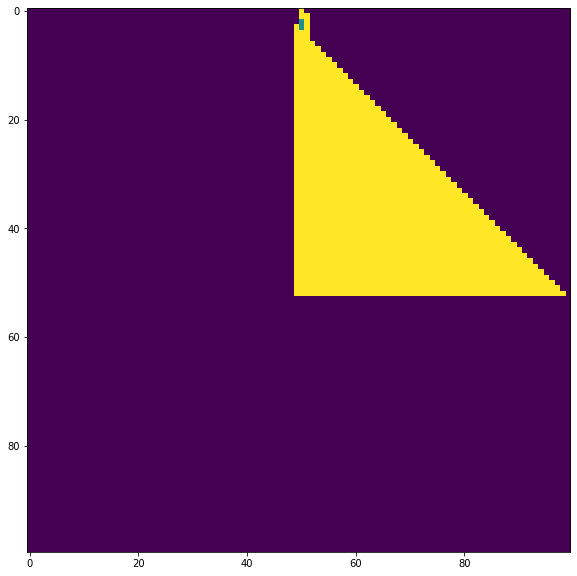

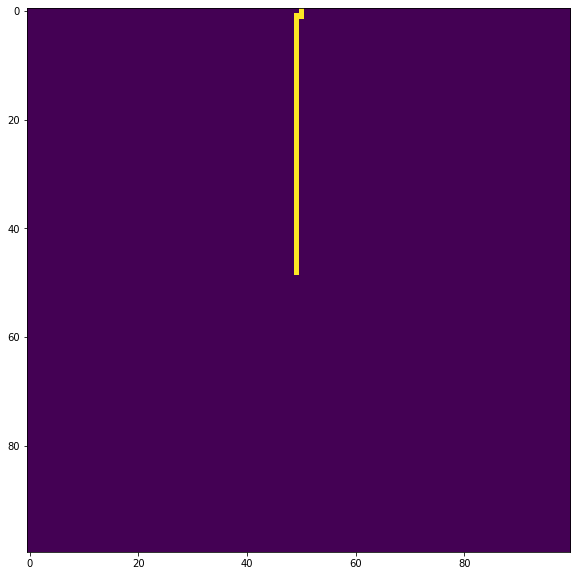

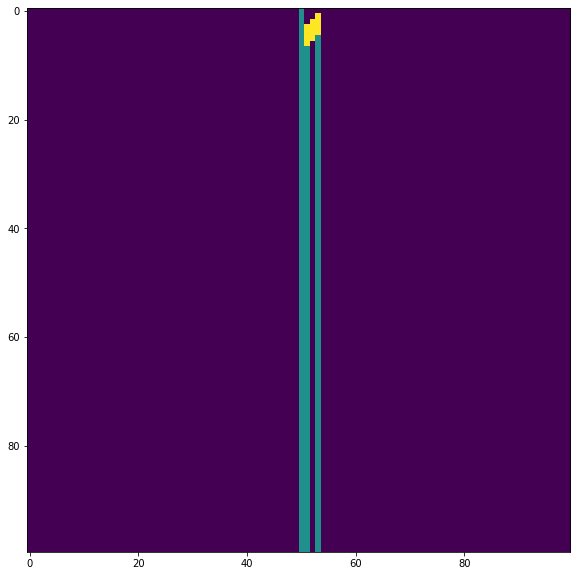

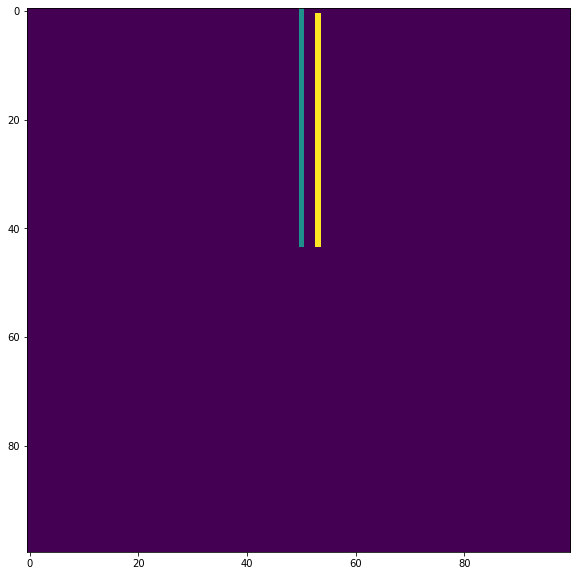

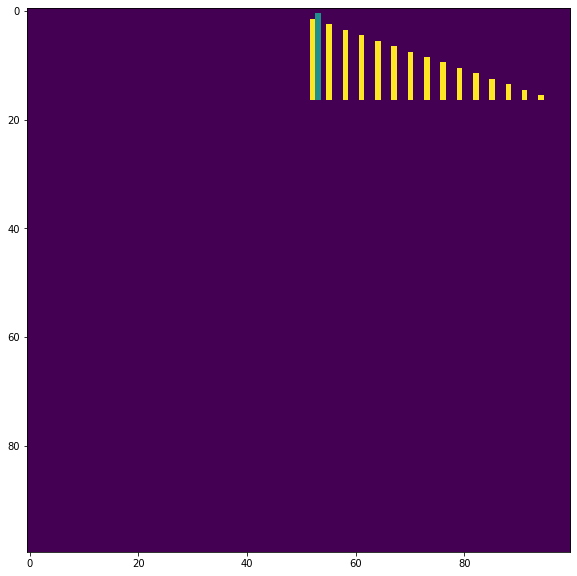

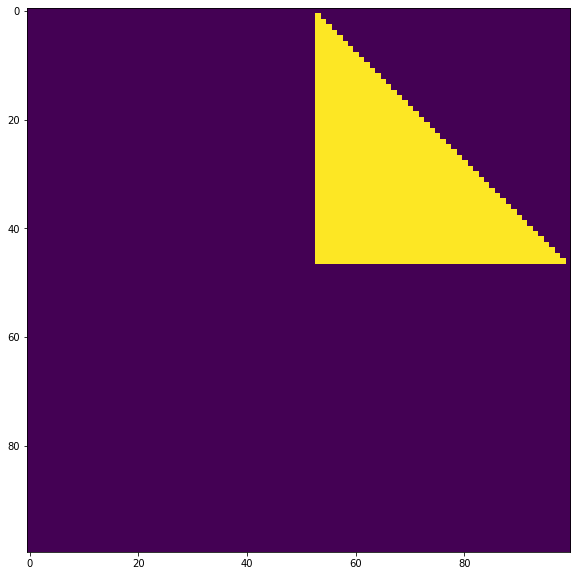

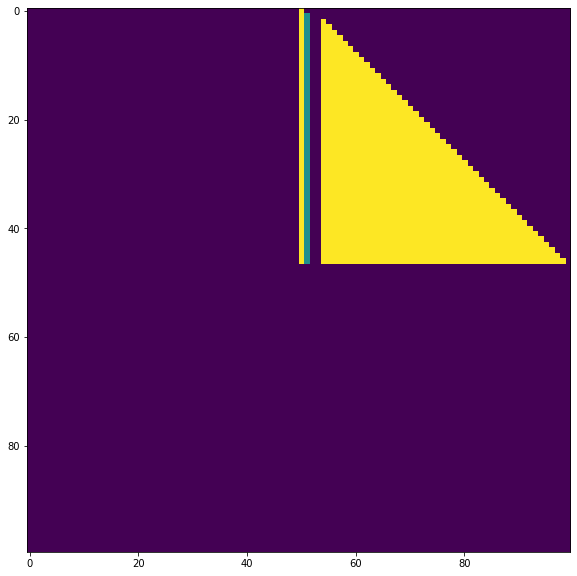

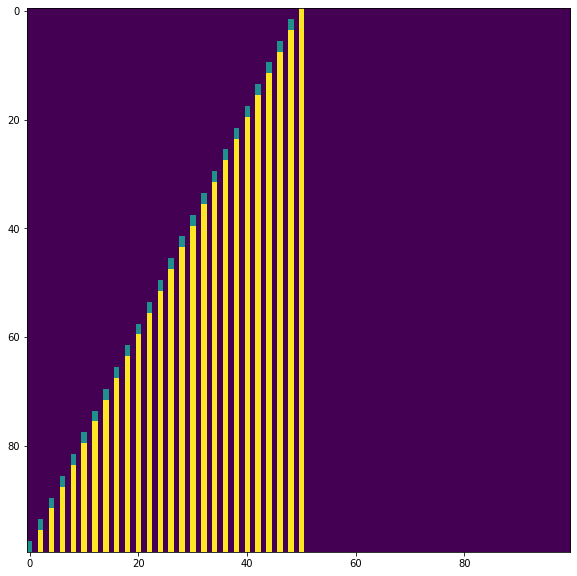

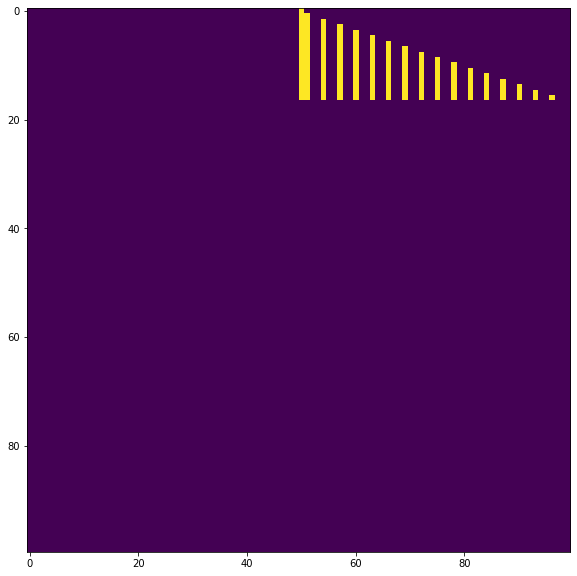

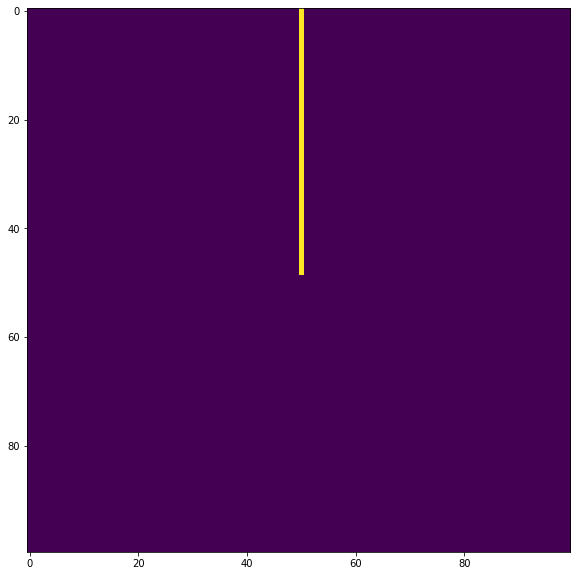

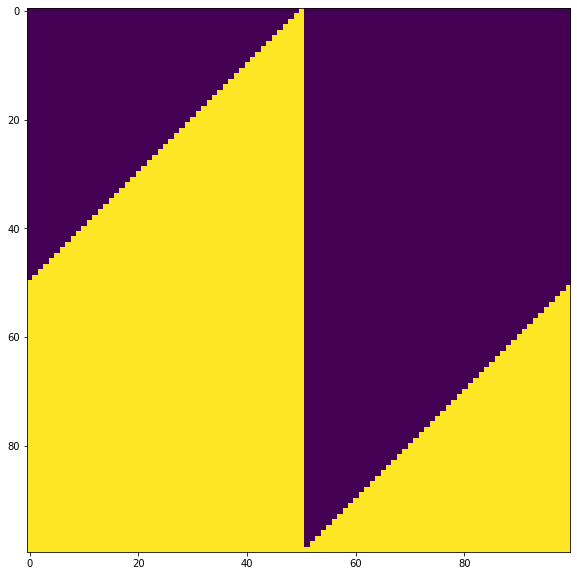

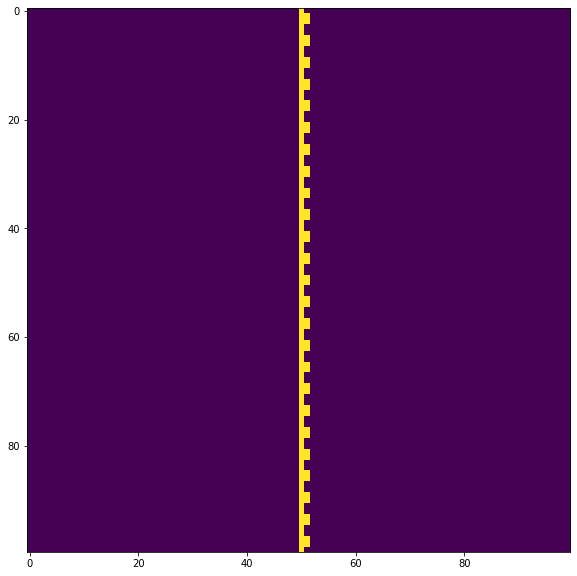

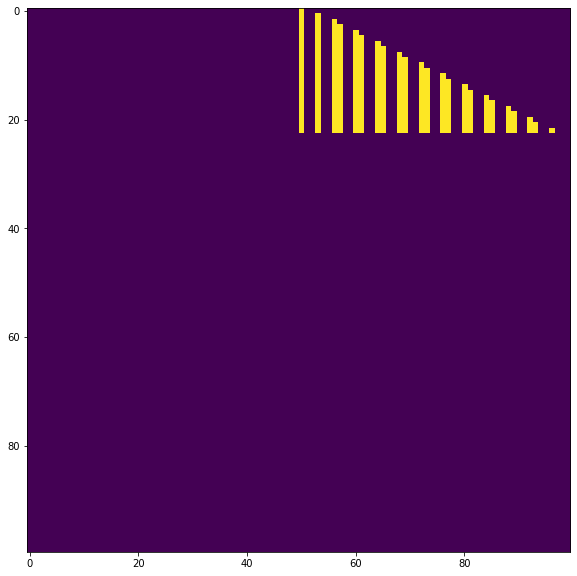

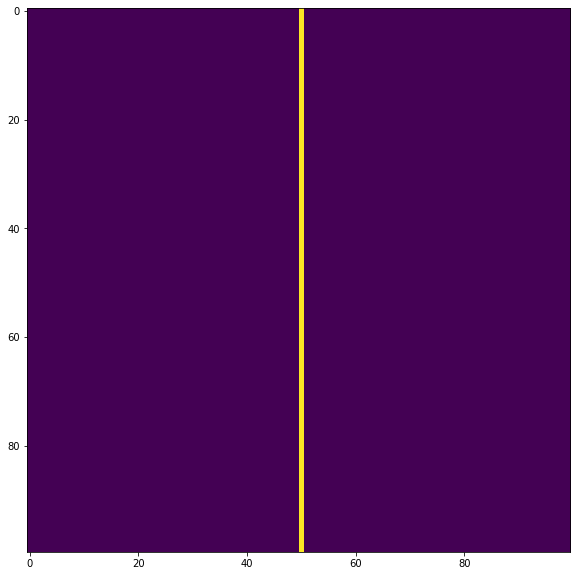

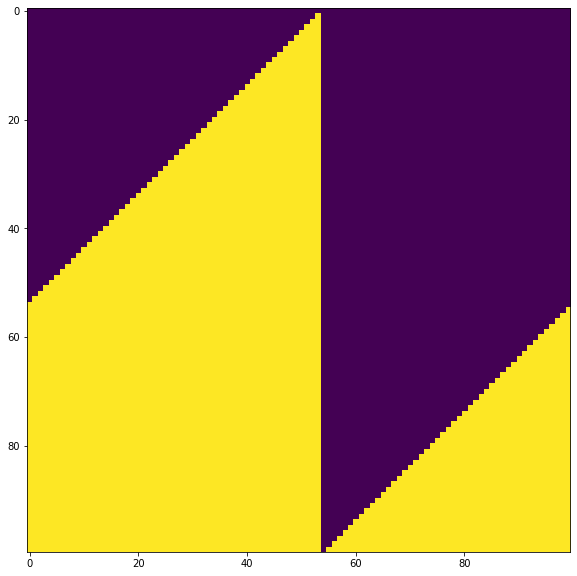

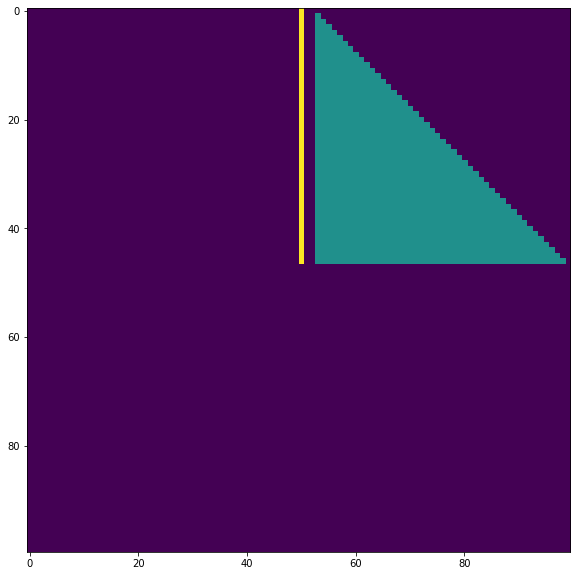

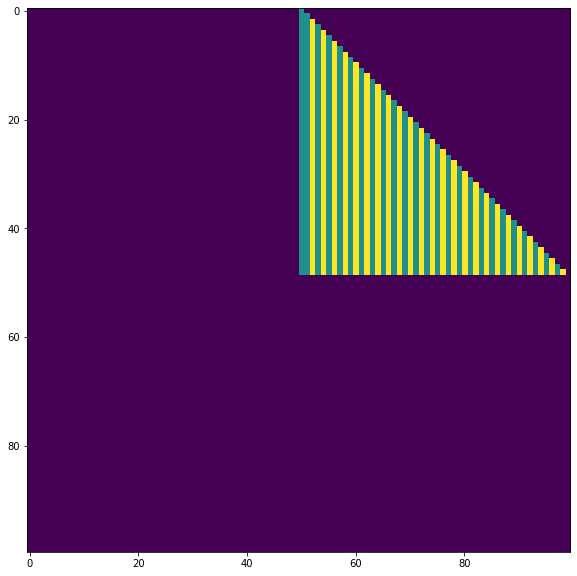

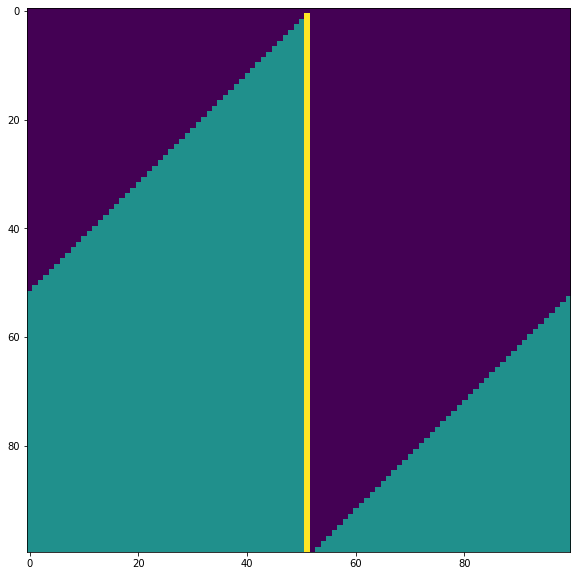

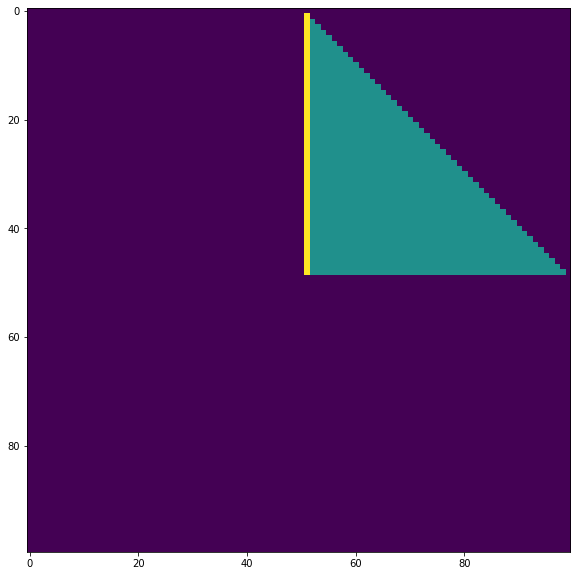

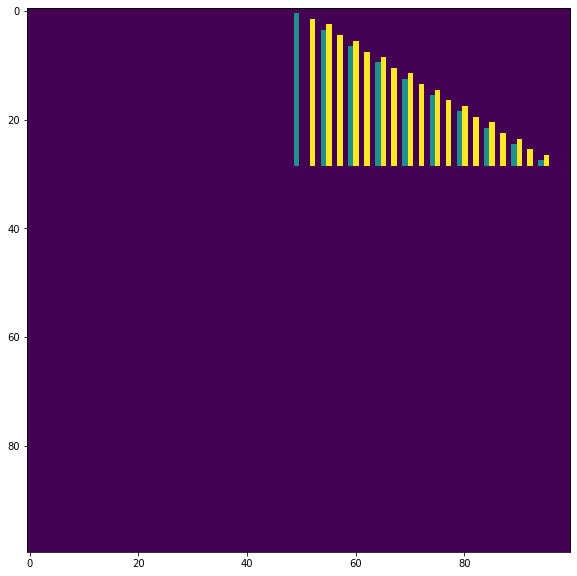

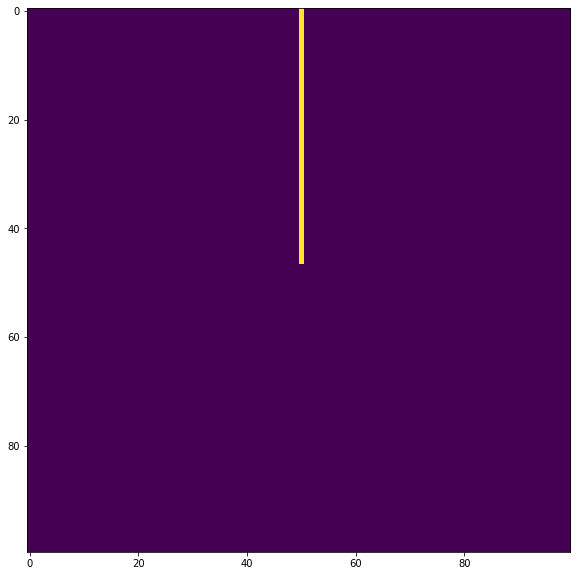

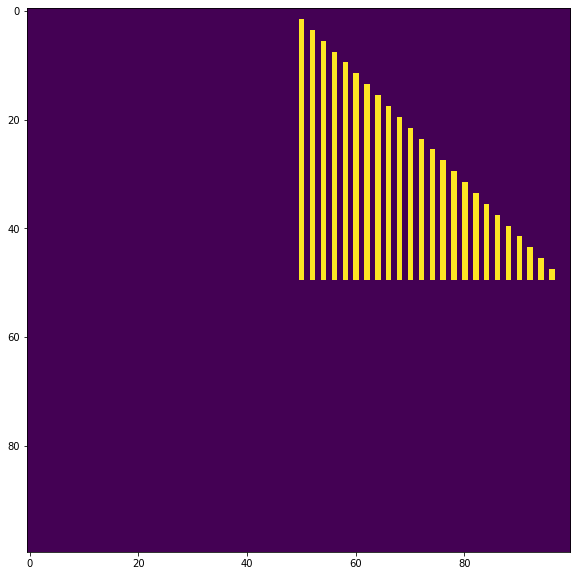

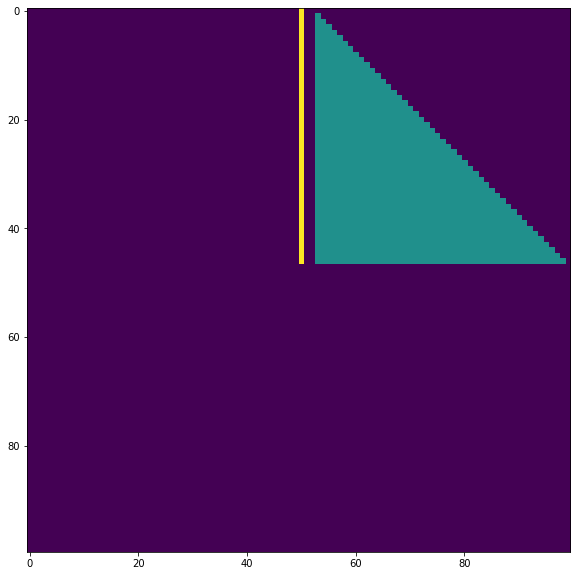

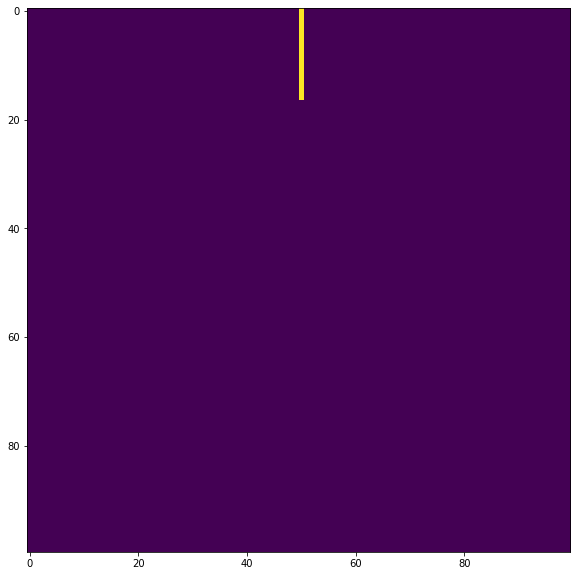

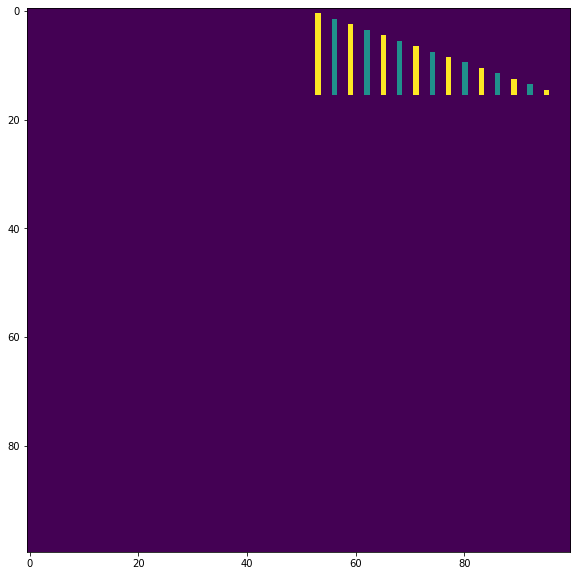

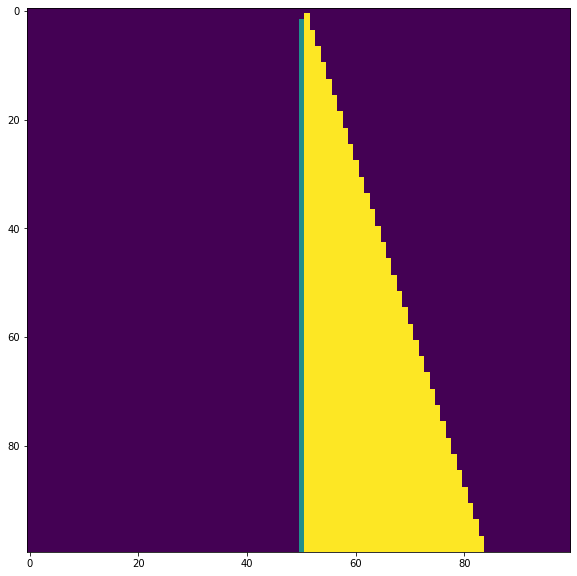

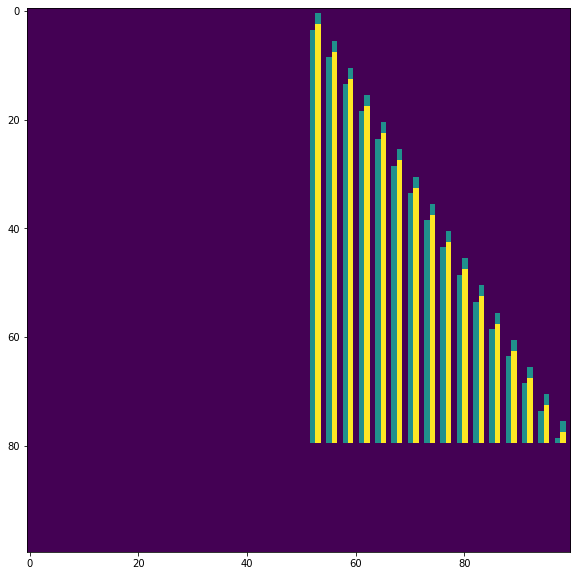

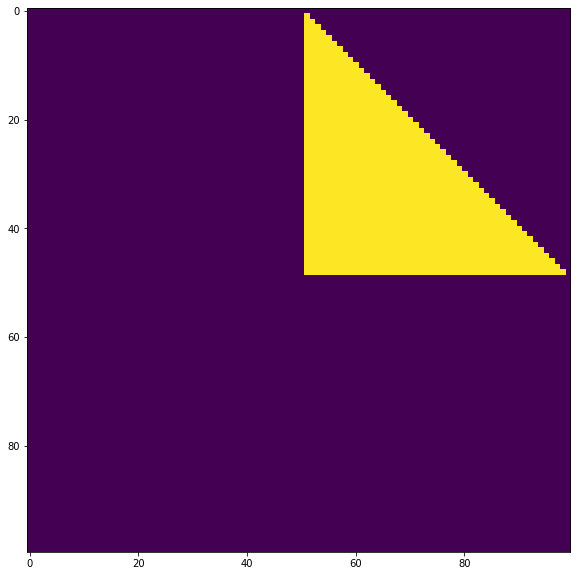

In [ ]:
for i in range(100):
    plt.figure(figsize=(10, 10))
    plt.imshow(RTM(),interpolation=None)
    plt.show()

In [ ]:
def run_utm(
        state = None,
        blank = None,
        rules = [],
        tape = [],
        halt = None,
        pos = 0):
    
    
    st = state
    if not tape: tape = [blank]
    if pos < 0: pos += len(tape)
    if pos >= len(tape) or pos < 0: raise Error( "bad init position")
    rules = dict(((s0, v0), (v1, dr, s1)) for (s0, v0, v1, dr, s1) in rules)
 
    while True:
        print(st, '\t', end=" ")
        for i, v in enumerate(tape):
            if i == pos: print("[%s]" % (v,), end=" ")
            else: print(v, end=" ")
        print()
 
        if st == halt: break
        if (st, tape[pos]) not in rules: break
 
        (v1, dr, s1) = rules[(st, tape[pos])]
        tape[pos] = v1
        if dr == 'left':
            if pos > 0: pos -= 1
            else: tape.insert(0, blank)
        if dr == 'right':
            pos += 1
            if pos >= len(tape): tape.append(blank) 
        st = s1

In [ ]:
# EXAMPLES
 
print("incr machine\n")
run_utm(
    halt = 'qf',
	state = 'q0',
	tape = list("111"),
	blank = 'B',
	rules = map(tuple, 
               ["q0 1 1 right q0".split(),
		        "q0 B 1 stay  qf".split()]
        )
    )

incr machine

q0 	 [1] 1 1 
q0 	 1 [1] 1 
q0 	 1 1 [1] 
q0 	 1 1 1 [B] 
qf 	 1 1 1 [1] 


In [ ]:
print("\nbusy beaver\n")
run_utm(
    halt = 'halt',
	state = 'a',
	blank = '0',
	rules = map(tuple,
        ["a 0 1 right b".split(),
         "a 1 1 left  c".split(),
         "b 0 1 left  a".split(),
         "b 1 1 right b".split(),
         "c 0 1 left  b".split(),
         "c 1 1 stay  halt".split()]
        )
    )


busy beaver

a 	 [0] 
b 	 1 [0] 
a 	 [1] 1 
c 	 [0] 1 1 
b 	 [0] 1 1 1 
a 	 [0] 1 1 1 1 
b 	 1 [1] 1 1 1 
b 	 1 1 [1] 1 1 
b 	 1 1 1 [1] 1 
b 	 1 1 1 1 [1] 
b 	 1 1 1 1 1 [0] 
a 	 1 1 1 1 [1] 1 
c 	 1 1 1 [1] 1 1 
halt 	 1 1 1 [1] 1 1 


In [ ]:
 
print("\nsorting test\n")
run_utm(halt = 'STOP',
	state = 'A',
	blank = '0',
	tape = "2 2 2 1 2 2 1 2 1 2 1 2 1 2".split(),
	rules = map(tuple,
       ["A 1 1 right A".split(),
		"A 2 3 right B".split(),
		"A 0 0 left  E".split(),
		"B 1 1 right B".split(),
		"B 2 2 right B".split(),
		"B 0 0 left  C".split(),
		"C 1 2 left  D".split(),
		"C 2 2 left  C".split(),
		"C 3 2 left  E".split(),
		"D 1 1 left  D".split(),
		"D 2 2 left  D".split(),
		"D 3 1 right A".split(),
		"E 1 1 left  E".split(),
		"E 0 0 right STOP".split()]
        )
    )


sorting test

A 	 [2] 2 2 1 2 2 1 2 1 2 1 2 1 2 
B 	 3 [2] 2 1 2 2 1 2 1 2 1 2 1 2 
B 	 3 2 [2] 1 2 2 1 2 1 2 1 2 1 2 
B 	 3 2 2 [1] 2 2 1 2 1 2 1 2 1 2 
B 	 3 2 2 1 [2] 2 1 2 1 2 1 2 1 2 
B 	 3 2 2 1 2 [2] 1 2 1 2 1 2 1 2 
B 	 3 2 2 1 2 2 [1] 2 1 2 1 2 1 2 
B 	 3 2 2 1 2 2 1 [2] 1 2 1 2 1 2 
B 	 3 2 2 1 2 2 1 2 [1] 2 1 2 1 2 
B 	 3 2 2 1 2 2 1 2 1 [2] 1 2 1 2 
B 	 3 2 2 1 2 2 1 2 1 2 [1] 2 1 2 
B 	 3 2 2 1 2 2 1 2 1 2 1 [2] 1 2 
B 	 3 2 2 1 2 2 1 2 1 2 1 2 [1] 2 
B 	 3 2 2 1 2 2 1 2 1 2 1 2 1 [2] 
B 	 3 2 2 1 2 2 1 2 1 2 1 2 1 2 [0] 
C 	 3 2 2 1 2 2 1 2 1 2 1 2 1 [2] 0 
C 	 3 2 2 1 2 2 1 2 1 2 1 2 [1] 2 0 
D 	 3 2 2 1 2 2 1 2 1 2 1 [2] 2 2 0 
D 	 3 2 2 1 2 2 1 2 1 2 [1] 2 2 2 0 
D 	 3 2 2 1 2 2 1 2 1 [2] 1 2 2 2 0 
D 	 3 2 2 1 2 2 1 2 [1] 2 1 2 2 2 0 
D 	 3 2 2 1 2 2 1 [2] 1 2 1 2 2 2 0 
D 	 3 2 2 1 2 2 [1] 2 1 2 1 2 2 2 0 
D 	 3 2 2 1 2 [2] 1 2 1 2 1 2 2 2 0 
D 	 3 2 2 1 [2] 2 1 2 1 2 1 2 2 2 0 
D 	 3 2 2 [1] 2 2 1 2 1 2 1 2 2 2 0 
D 	 3 2 [2] 1 2 2 1 2 1 2 1 2 2 2 0 
D 	 3 [2] 2 1 